# Introducción

En esta sección vamos a crear un ETL para poder extraer, trasformar y cargar los datos referentes a LISTADO de ESTABLECIMIENTOS DE FARMACIAS - REFAR - 2021, disponible en un repositorio público

- https://datos.gob.ar/dataset/salud-listado-establecimientos-farmacias/archivo/salud_19338ea7-a492-4af3-b212-18f8f4af9184

In [1]:
# stdlib
import datetime
from pathlib import Path
import os

In [2]:
# plots and datas libraries
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

## Configuraciones

Definiremos las rutas de nuestra extración de datos:

In [3]:
BASE_FILE_DIR = Path("temp")

y creamos un string que manipularemos com el método `.format()`, para mayor comodidad.

In [4]:
file_path_crib = 'data/{category}/{year}-{month:02d}/{province}-{day:02d}-{month:02d}-{year}.csv'

Además, creamos un diccionario con las claves `name` y `url` para extraer de la url nuetro dataset y desglosarlo en varios archivo, ya sea por provincia, por departamentos de cada provincia, etc.

**Nota:** Es una lista de diccionarios porque en muchos ccasos puede ser que tengamos que analizar datos de distintas fuentes y combinarlos. En este caso es sólo una fuente pero es una buena práctiva dejarlo como lista. 

In [5]:
categories = [
    {
        "name": "pharmacies",
        "url": "http://datos.salud.gob.ar/dataset/39117f8f-e2bc-4571-a572-15a6ce7ea9e1/resource/19338ea7-a492-4af3-b212-18f8f4af9184/download/establecimientos-farmacias-enero-2021.csv"
    }
]

## Extract

En esta sección comenzamos el proceso de extracción de los datos:

In [6]:
farmacias = categories[0]
farmacias

{'name': 'pharmacies',
 'url': 'http://datos.salud.gob.ar/dataset/39117f8f-e2bc-4571-a572-15a6ce7ea9e1/resource/19338ea7-a492-4af3-b212-18f8f4af9184/download/establecimientos-farmacias-enero-2021.csv'}

In [7]:
# realizamos la petición GET pata obtener los recursos (datos) de la web 
r = requests.get(farmacias["url"])
# chequeamos que se haya hecho la petición correctamente,
# para ello vemos que obtenemos un status code 200 que
# indica que esta todo OK.
r 

<Response [200]>

Para evitar problemas, codificamos todo a UTF-8. Esto nos va a ahorrar muchos problemas más adelante.

In [8]:
r.encoding = 'utf-8'

creamos una ruta de tipo `string` donde guardaremos los datos exxtraidos de la web.

In [9]:
now = datetime.datetime.now()
now
# create a path string
file_path = file_path_crib.format(
    category=farmacias["name"],
    year=now.year,
    month=now.month,
    day=now.day,
    province="Argentina"
)
file_path

'data/pharmacies/2022-10/Argentina-18-10-2022.csv'

No nos olvidemos que debe estar dentro de nuetro directorio `temp`.

In [10]:
farmacias_path = BASE_FILE_DIR / file_path
farmacias_path

PosixPath('temp/data/pharmacies/2022-10/Argentina-18-10-2022.csv')

Creamos un archivo en la ruta `temp/data/pharmacies/2022-10/Argentina-17-10-2022.csv`

In [11]:
farmacias_path.parent.mkdir(parents=True, exist_ok=True)

Extraemos el texto de nuestra petición request `r` dentro de `temp/data/pharmacies/2022-10/Argentina-17-10-2022.csv`.

In [12]:
with open(farmacias_path, "w") as f:
    f.write(r.text)

In [13]:
farmacias_path

PosixPath('temp/data/pharmacies/2022-10/Argentina-18-10-2022.csv')

Y con esto hemos descargado los datos de todas las farmacias Argentinas desde el repositorio de `datos.gob,ar`.

## Transform

Para hacer una transformación de nuestra data, debemos analizar los datos crudos. Identificar las `features` que nos servirán para sacar información útil de los datos. Esto depende mucho de la necesidad inicial del proyecto, la data cruda, la experiencia y capacidad del científico/analista de datos, etc.

Con esto quiero decir que este análisis es subjetivo, solamente es una manera alternativa de hacer las cosas. No es algo que esté determinado o escrito en piedras como un mandamiento.

In [14]:
# leemos nuesto archivo.csv
df = pd.read_csv(farmacias_path)
df.head()

,establecimiento_id,establecimiento_nombre,localidad_id,localidad_nombre,provincia_id,provincia_nombre,departamento_id,departamento_nombre,cod_loc,cod_ent,origen_financiamiento,tipologia_id,tipologia_nombre,tipologia,cp,domicilio,sitio_web
0,70260072329721,PUJOL,26007020000,PUERTO MADRYN,26,CHUBUT,7,BIEDMA,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,9120,LOS MAITENES 1538,NaN
1,70100352324743,SALUDFARMA,10035020000,BELEN,10,CATAMARCA,35,BELÉN,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,4750,Mitre 14,NaN
2,70064412318286,MARSICO,6441030015,LA PLATA,6,BUENOS AIRES,441,LA PLATA,30,15.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,1900,Avenida 7 445,NaN
3,70340492347884,PERALTA HNOS,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,3610,Avenida San Martin 470,NaN
4,70140142334991,VALENTINO,14014010000,CORDOBA,14,CÓRDOBA,14,CAPITAL,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,5000,Catamarca 1047,NaN


In [15]:
# verificamos la cantidad de registros nulos en cada campo
df.isnull().sum()

establecimiento_id            0
establecimiento_nombre        0
localidad_id                  0
localidad_nombre              0
provincia_id                  0
provincia_nombre              0
departamento_id               0
departamento_nombre           0
cod_loc                       0
cod_ent                     384
origen_financiamiento         0
tipologia_id                  0
tipologia_nombre              0
tipologia                     0
cp                            0
domicilio                     0
sitio_web                 13633
dtype: int64

In [16]:
# vemos cuales son todas las columnas
df.columns

Index(['establecimiento_id', 'establecimiento_nombre', 'localidad_id',
       'localidad_nombre', 'provincia_id', 'provincia_nombre',
       'departamento_id', 'departamento_nombre', 'cod_loc', 'cod_ent ',
       'origen_financiamiento', 'tipologia_id', 'tipologia_nombre',
       'tipologia', 'cp', 'domicilio', 'sitio_web'],
      dtype='object')

Renombramos todas las columnas

In [17]:
renamed_cols = {
    'establecimiento_id': 'id',
    'establecimiento_nombre': 'nombre',
    'domicilio':'domicilio',
    'localidad_id': 'id_localidad',
    'localidad_nombre': 'localidad',
    'provincia_id': 'id_provincia',
    'provincia_nombre': 'provincia',
    'departamento_id': 'id_departamento',
    'departamento_nombre': 'departamento',
    'cod_loc': 'cod_localidad',
    'tipologia_id': 'id_tipologia',
    'tipologia_nombre': 'tipologia',
    'cp': 'codigo postal',
    'sitio_web': 'webpage',
}

In [18]:
df = df.rename(columns = renamed_cols)

In [19]:
df.columns
df.set_index("id")

,nombre,id_localidad,localidad,id_provincia,provincia,id_departamento,departamento,cod_localidad,cod_ent,origen_financiamiento,id_tipologia,tipologia,tipologia,codigo postal,domicilio,webpage
id,,,,,,,,,,,,,,,,
70260072329721,PUJOL,26007020000,PUERTO MADRYN,26,CHUBUT,7,BIEDMA,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,9120,LOS MAITENES 1538,NaN
70100352324743,SALUDFARMA,10035020000,BELEN,10,CATAMARCA,35,BELÉN,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,4750,Mitre 14,NaN
70064412318286,MARSICO,6441030015,LA PLATA,6,BUENOS AIRES,441,LA PLATA,30,15.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,1900,Avenida 7 445,NaN
70340492347884,PERALTA HNOS,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,3610,Avenida San Martin 470,NaN
70140142334991,VALENTINO,14014010000,CORDOBA,14,CÓRDOBA,14,CAPITAL,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,5000,Catamarca 1047,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70460212355713,FARMACOST,46021020000,ANILLACO,46,LA RIOJA,21,CASTRO BARROS,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,5301,Coronel Nicolas Barros s/n Barrio Virgen del F...,NaN
70421472354613,FARMACIA MUSSO,42147030000,TRENEL,42,LA PAMPA,147,TRENEL,30,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,6369,9 DE JULIO 545,NaN
70940142195567,FARMACIA- HOSPITAL REGIONAL USHUAIA,94014020000,USHUAIA,94,TIERRA DEL FUEGO,14,USHUAIA,20,0.0,Provincial,70,FARMACIA,Farmacia en Establecimiento de Salud,9410,12 de octubre 65,NaN


Seleccionamos las columnas que podrìan darnos la información que requerimos.

In [20]:
cols = [
    'id',
    'nombre',
    'id_provincia',
    'provincia',
    'id_departamento',
    'departamento',
    'id_localidad',
    'localidad',
    'codigo postal',
    'domicilio',
    'webpage',
]

In [21]:
df = df[cols]
df

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
0,70260072329721,PUJOL,26,CHUBUT,7,BIEDMA,26007020000,PUERTO MADRYN,9120,LOS MAITENES 1538,NaN
1,70100352324743,SALUDFARMA,10,CATAMARCA,35,BELÉN,10035020000,BELEN,4750,Mitre 14,NaN
2,70064412318286,MARSICO,6,BUENOS AIRES,441,LA PLATA,6441030015,LA PLATA,1900,Avenida 7 445,NaN
3,70340492347884,PERALTA HNOS,34,FORMOSA,49,PILCOMAYO,34049010000,CLORINDA,3610,Avenida San Martin 470,NaN
4,70140142334991,VALENTINO,14,CÓRDOBA,14,CAPITAL,14014010000,CORDOBA,5000,Catamarca 1047,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13672,70460212355713,FARMACOST,46,LA RIOJA,21,CASTRO BARROS,46021020000,ANILLACO,5301,Coronel Nicolas Barros s/n Barrio Virgen del F...,NaN
13673,70421472354613,FARMACIA MUSSO,42,LA PAMPA,147,TRENEL,42147030000,TRENEL,6369,9 DE JULIO 545,NaN
13674,70940142195567,FARMACIA- HOSPITAL REGIONAL USHUAIA,94,TIERRA DEL FUEGO,14,USHUAIA,94014020000,USHUAIA,9410,12 de octubre 65,NaN
13675,70420702154608,FARMACIA INSTITUCIONAL E.A. MANUEL FREIRE,42,LA PAMPA,70,GUATRACHÉ,42070030000,GUATRACHE,6309,Primera Junta Nº 158,NaN


## Load

Cargamos la data en alguna base de datos o archivo de gestión (como en este caso en un archivo `.csv`).

In [22]:
# create a path string
file_path = file_path_crib.format(
    category=farmacias["name"],
    year=now.year,
    month=now.month,
    day=now.day,
    province="ETL-Argentina"
)
farmacias_path = BASE_FILE_DIR / file_path
df.to_csv(farmacias_path)

# Análisis de los datos

## Total de farmacias por cada provincia en Argentina

In [23]:
provinces = df['provincia'].value_counts().keys()
total_farmacias = df['provincia'].value_counts().values

In [24]:
porcent = total_farmacias/ df.shape[0] * 100
df_provincias = pd.DataFrame(
    {
        "Provincias": provinces,
        "Total de Farmacias": total_farmacias,
        "% Total de Farmacias": ['{:0.2f}%'.format(p) for p in porcent]
    }
)

In [25]:
df_provincias

,Provincias,Total de Farmacias,% Total de Farmacias
0,BUENOS AIRES,5053,36.95%
1,SANTA FE,1778,13.00%
2,CABA,1024,7.49%
3,TUCUMÁN,611,4.47%
4,MISIONES,594,4.34%
5,CÓRDOBA,566,4.14%
6,ENTRE RÍOS,489,3.58%
7,CHACO,426,3.11%
8,SALTA,337,2.46%
9,CORRIENTES,303,2.22%


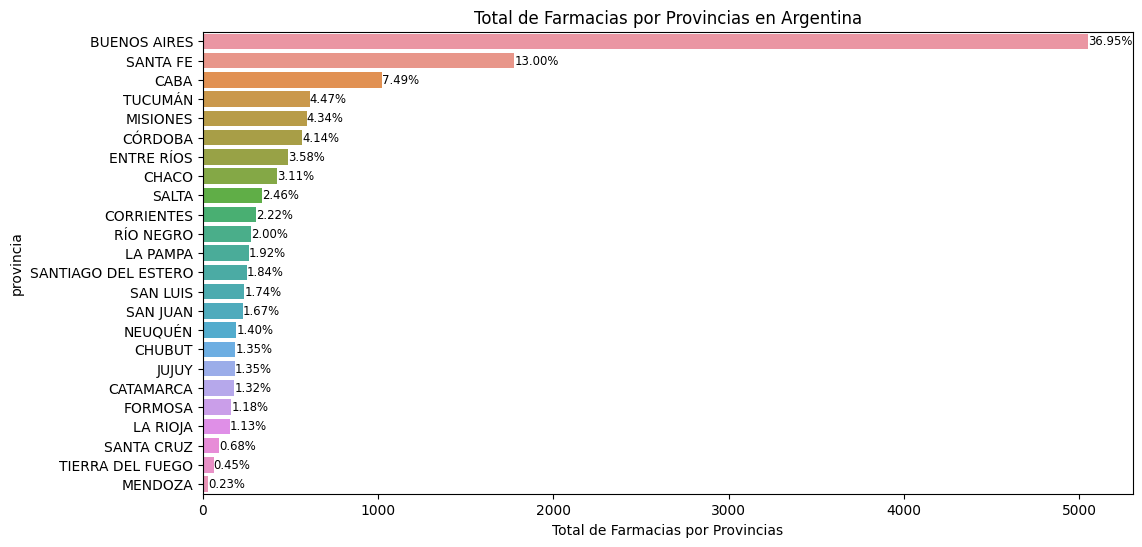

In [26]:
data_gen_cnt = df['provincia'].value_counts()
data_ordered = sorted(data_gen_cnt.items(), key=lambda x: x[1], reverse=True)
data_order = [ valor for valor, contador in data_ordered ]
data_order    
figsize = (12,6)
fig = plt.figure(figsize=figsize)
sns.countplot(data=df, y='provincia', order=data_order)
data_departmen = data_gen_cnt.values.sum()
for i, (valor, contador) in enumerate(data_ordered):
     pcnt = '{:0.2f}%'.format(100*contador/data_departmen)
     plt.text(contador, i, pcnt, va='center', size='smaller')
plt.title(f"Total de Farmacias por Provincias en Argentina")
plt.xlabel("Total de Farmacias por Provincias")
plt.show()


### Filtramos los datos por cada Provincia

In [27]:
# Get pharms by province
def pharms_by_province(province):
    df_province =  df[df["provincia"]==province]
    return df_province

# Get all pharms by department in some province
def pharms_by_department(df_province):
    department = df_province['departamento'].value_counts()
    porcent = 100*department / department.values.sum()
    df_pharms_by_department = pd.DataFrame(
        {
            "Departamentos": department.keys(),
            "Total de Farmacias por Departamentos": department.values,
            "% Total de Farmacias por Departamentos": ['{:0.2f}%'.format(p) for p in porcent]
        }
    )
    df_pharms_by_department
    return df_pharms_by_department

In [28]:
data_allprovinces = {index : pharms_by_province(index) for index in provinces}
data_alldepartments = {index : pharms_by_department(data_allprovinces[index]) for index in provinces}


In [29]:
def total_department_in_percent(province, figsize=None):
    df_province = data_allprovinces[province]
    data_gen_cnt = df_province['departamento'].value_counts()
    
    data_ordered = sorted(data_gen_cnt.items(), key=lambda x: x[1], reverse=True)
    data_order = [ valor for valor, contador in data_ordered ]
    
    _figsize = (12,10) if figsize is None else figsize
    fig = plt.figure(figsize=_figsize)
    sns.countplot(data=df_province, y='departamento', order=data_order)
    data_departmen = data_gen_cnt.values.sum()
    for i, (valor, contador) in enumerate(data_ordered):
        pcnt = '{:0.2f}%'.format(100*contador/data_departmen)
        plt.text(contador, i, pcnt, va='center', size='smaller')
    plt.title(f"Total de Farmacias por Departamento en {province}")
    plt.xlabel("Total de Farmacias por Departamento")
    plt.show()

# BUENOS AIRES

In [30]:
buenos_aires = provinces[0]
buenos_aires

'BUENOS AIRES'

In [31]:
df_buenos_aires = data_allprovinces[buenos_aires]
df_buenos_aires.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
2,70064412318286,MARSICO,6,BUENOS AIRES,441,LA PLATA,6441030015,LA PLATA,1900,Avenida 7 445,NaN
5,70060352318295,MODERNA,6,BUENOS AIRES,35,AVELLANEDA,6035010006,PIÑEYRO,1870,Avenida Galicia 410,NaN
6,70067072315037,BOTIQUIN FARMACIA,6,BUENOS AIRES,707,SALADILLO,6707000003,BLAQUIER,6065,Buenos Aires S/n,NaN
7,70060912318298,BIANCHI,6,BUENOS AIRES,91,BERAZATEGUI,6091010001,BERAZATEGUI,1884,Avenida 14 Presidente Juan Domingo Perón 4653,NaN
8,70060912818296,MUTUAL DUCILO,6,BUENOS AIRES,91,BERAZATEGUI,6091010001,BERAZATEGUI,1884,Avenida Mitre 442,NaN


In [32]:
df_buenos_aires_by_departments = data_alldepartments[buenos_aires]
df_buenos_aires_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,LA PLATA,355,7.03%
1,LA MATANZA,305,6.04%
2,GENERAL PUEYRREDÓN,234,4.63%
3,ALMIRANTE BROWN,190,3.76%
4,QUILMES,171,3.38%
...,...,...,...
130,LAPRIDA,3,0.06%
131,GENERAL LAVALLE,2,0.04%
132,PILA,2,0.04%
133,GENERAL GUIDO,2,0.04%


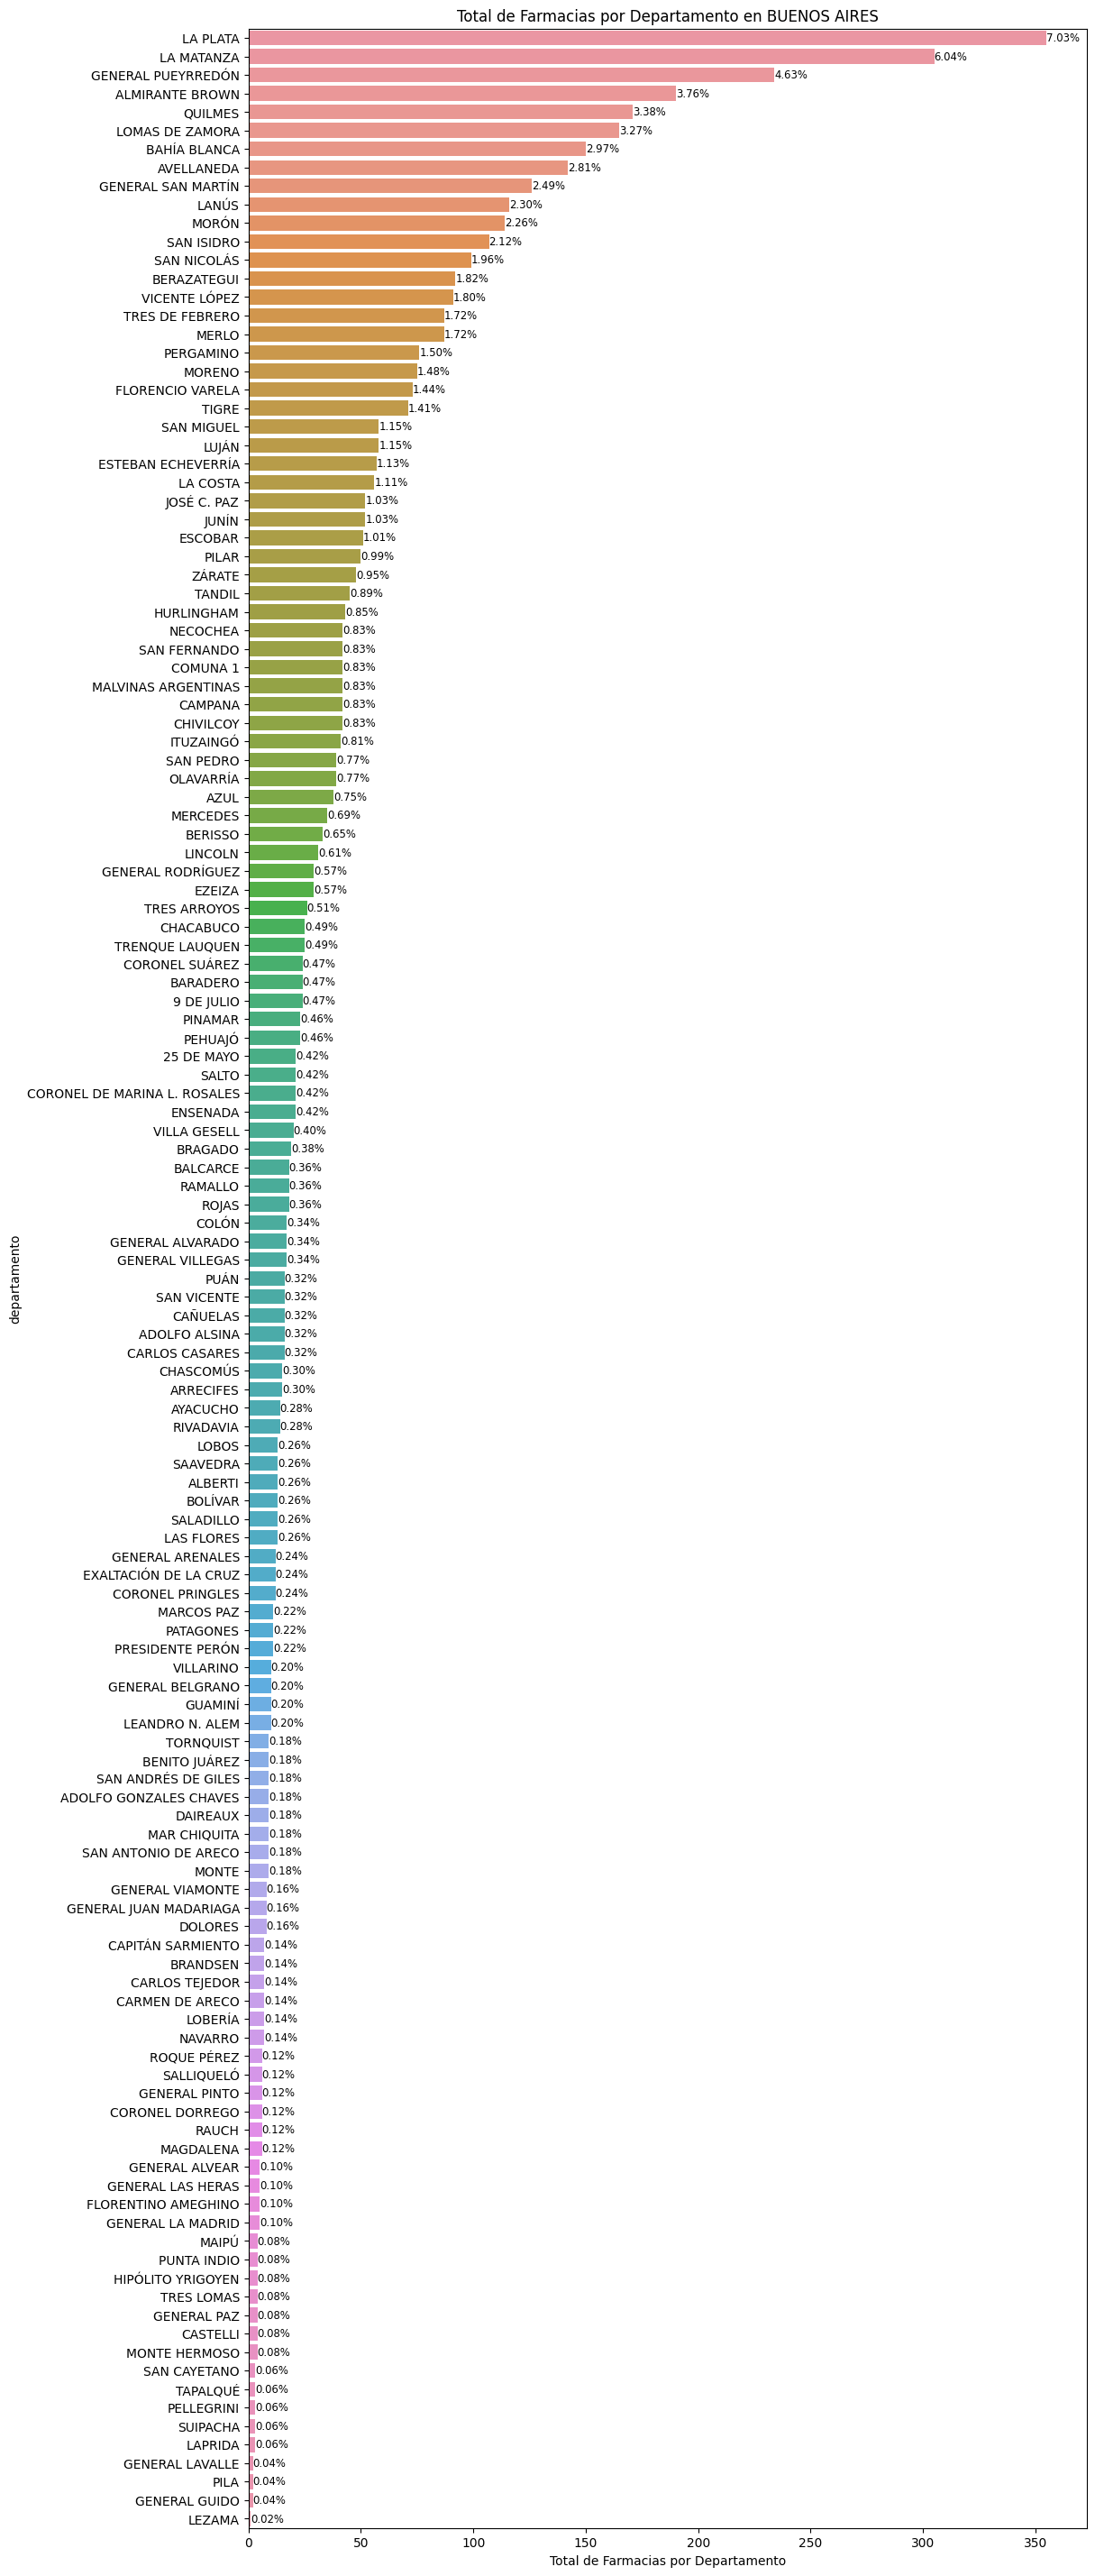

In [33]:
total_department_in_percent(buenos_aires,  (12,36))

# SANTA FE

In [34]:
santa_fe = provinces[1]
santa_fe

'SANTA FE'

In [35]:
df_santa_fe = data_allprovinces[santa_fe]
df_santa_fe.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
35,70820842386306,FERRAN,82,SANTA FE,84,ROSARIO,82084270000,ROSARIO,2000,DOMINGO FAUSTINO SARMIENTO 3098,NaN
36,70820842386310,PETRUZZI,82,SANTA FE,84,ROSARIO,82084270000,ROSARIO,2000,Av PELLEGRINI 3770,NaN
37,70820842386315,RODRIGO,82,SANTA FE,84,ROSARIO,82084270000,ROSARIO,2000,JUAN JOSE PASO 5880,NaN
38,70820842386316,AZAR,82,SANTA FE,84,ROSARIO,82084270000,ROSARIO,2000,Av Pte PERON,NaN
39,70820842386318,ARCO IRIS,82,SANTA FE,84,ROSARIO,82084270000,ROSARIO,2000,27 DE FEBRERO 5302,NaN


In [36]:
df_santa_fe_by_departments = data_alldepartments[santa_fe]
df_santa_fe_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,ROSARIO,678,38.13%
1,LA CAPITAL,187,10.52%
2,SAN LORENZO,115,6.47%
3,CASTELLANOS,99,5.57%
4,CASEROS,94,5.29%
5,GENERAL OBLIGADO,83,4.67%
6,LAS COLONIAS,69,3.88%
7,GENERAL LÓPEZ,67,3.77%
8,SAN MARTÍN,63,3.54%
9,CONSTITUCIÓN,54,3.04%


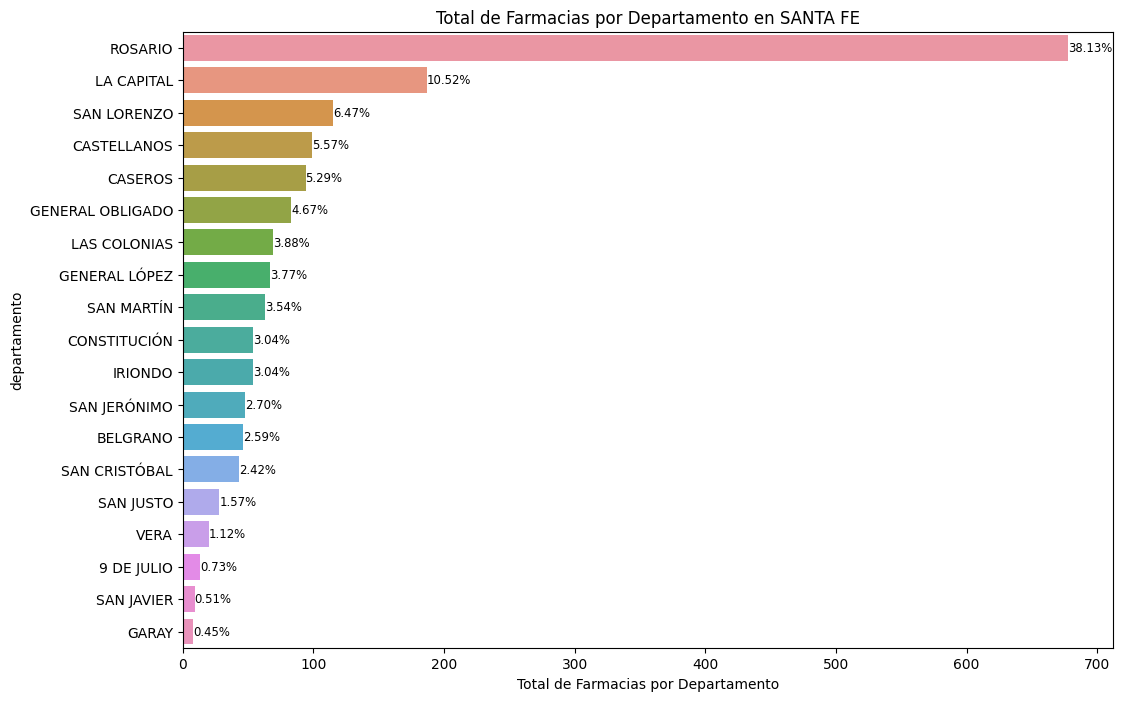

In [37]:
total_department_in_percent(province=santa_fe, figsize=(12,8))

# CABA

In [38]:
CABA = provinces[2]
CABA

'CABA'

In [39]:
df_caba = data_allprovinces[CABA]
df_caba.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
30,70020012317538,BRIUT,2,CABA,0,COMUNA 1,2000010000,CIUDAD DE BUENOS AIRES,1414,Gurruchaga 684,NaN
77,70020012317495,FARMACIA HIGIA,2,CABA,0,COMUNA 1,2000010000,CIUDAD DE BUENOS AIRES,1425,Paraguay 3514,NaN
83,70020012317536,ACASSUSO,2,CABA,0,COMUNA 1,2000010000,CIUDAD DE BUENOS AIRES,1408,ACASSUSO Nº 6382,NaN
84,70020012317755,VIDA,2,CABA,0,COMUNA 1,2000010000,CIUDAD DE BUENOS AIRES,1151,Constitución 1400,NaN
85,70020012317769,GUAIREÑA,2,CABA,0,COMUNA 1,2000010000,CIUDAD DE BUENOS AIRES,1153,Avenida Juan de Garay 1221,NaN


In [40]:
df_caba_by_departments = data_alldepartments[CABA]
df_caba_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,COMUNA 1,994,97.07%
1,COMUNA 5,7,0.68%
2,COMUNA 2,4,0.39%
3,COMUNA 14,4,0.39%
4,COMUNA 4,3,0.29%
5,COMUNA 6,3,0.29%
6,COMUNA 11,2,0.20%
7,COMUNA 7,2,0.20%
8,COMUNA 15,2,0.20%
9,COMUNA 3,1,0.10%


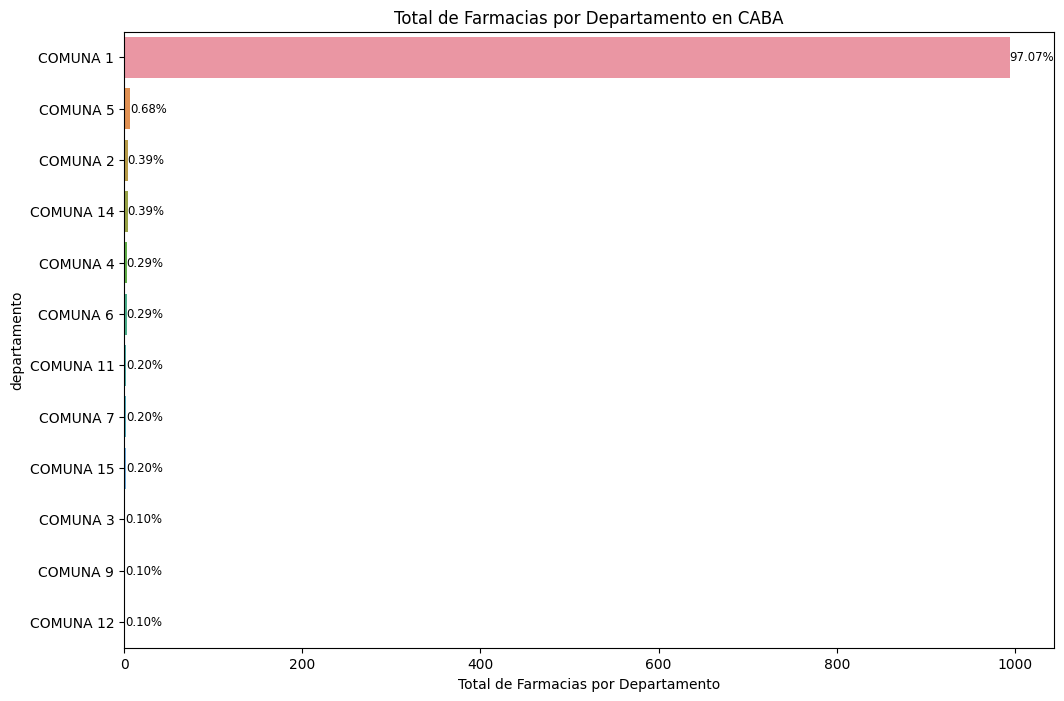

In [41]:
total_department_in_percent(province=CABA, figsize=(12,8))

# TUCUMÁN

In [42]:
tucuman = provinces[3]
tucuman

'TUCUMÁN'

In [43]:
df_tucuman = data_allprovinces[tucuman]
df_tucuman.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
1570,70900842196977,FARMACIA INTERNA CENTRO DE SALUD ZENON SANTILLAN,90,TUCUMÁN,84,CAPITAL,90084010000,SAN MIGUEL DE TUCUMAN,4000,Av. Avellaneda 750,NaN
7171,70900142397635,FARMACIA DEL ESTE,90,TUCUMÁN,14,CRUZ ALTA,90014010001,ALDERETES,4178,AV.RIVADAVIA 1300,NaN
7172,70900142397636,FARMACIA MODERNA,90,TUCUMÁN,14,CRUZ ALTA,90014020001,BANDA DEL RIO SALI,4109,AV.INDEPENDENCIA 210,NaN
7173,70900842397637,FARMACIA ARMONIA,90,TUCUMÁN,84,CAPITAL,90084010000,SAN MIGUEL DE TUCUMAN,4000,24 DE SETIEMBRE 210,NaN
7174,70900842397638,FARMACIA ADRI,90,TUCUMÁN,84,CAPITAL,90084010000,SAN MIGUEL DE TUCUMAN,4000,LAVALLE 2101,NaN


In [44]:
df_tucuman_by_departments = data_alldepartments[tucuman]
df_tucuman_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,332,54.34%
1,CRUZ ALTA,44,7.20%
2,TAFÍ VIEJO,37,6.06%
3,YERBA BUENA,35,5.73%
4,MONTEROS,26,4.26%
5,LULES,25,4.09%
6,CHICLIGASTA,25,4.09%
7,RÍO CHICO,18,2.95%
8,JUAN BAUTISTA ALBERDI,16,2.62%
9,LEALES,10,1.64%


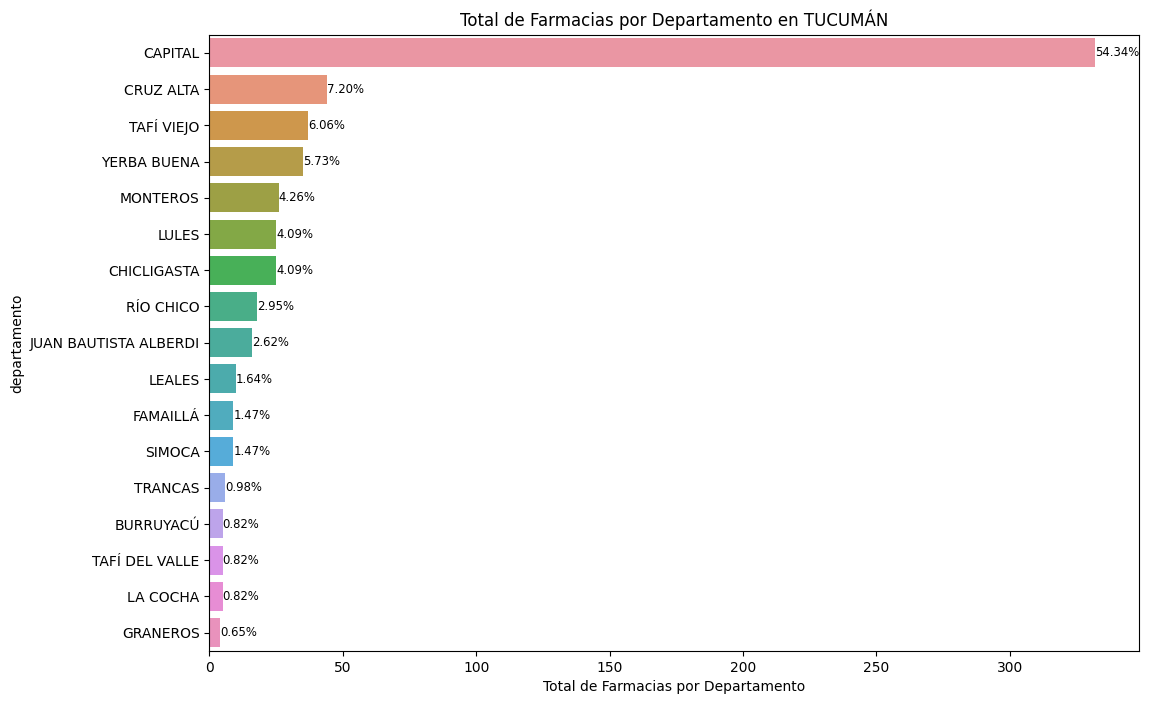

In [45]:
total_department_in_percent(province=tucuman, figsize=(12,8))

# MISIONES

In [46]:
misiones = provinces[4]
misiones

'MISIONES'

In [47]:
df_misiones = data_allprovinces[misiones]
df_misiones.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
108,70540702365577,ITATI,54,MISIONES,70,LEANDRO N. ALEM,54070070000,LEANDRO N. ALEM,3315,GUARANI 150,NaN
109,70540912365578,MODERNA SRL,54,MISIONES,91,OBERÁ,54091080000,OBERA,3360,Calle Córdoba 40,NaN
110,70540772365579,NOLAN,54,MISIONES,77,LIBERTADOR GRL. SAN MARTÍN,54077010000,CAPIOVI,3332,AV. LOS PROCERES Y PALO ROSA,NaN
111,70540772365581,SANTA RITA,54,MISIONES,77,LIBERTADOR GRL. SAN MARTÍN,54077010000,CAPIOVI,3332,Ruta Nacional 12,NaN
150,70540982365612,JARDIN,54,MISIONES,98,SAN IGNACIO,54098080000,JARDIN AMERICA,3328,LIBERTAD 385,NaN


In [48]:
df_misiones_by_departments = data_alldepartments[misiones]
df_misiones_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,236,39.73%
1,OBERÁ,62,10.44%
2,ELDORADO,37,6.23%
3,SAN IGNACIO,33,5.56%
4,LIBERTADOR GRL. SAN MARTÍN,30,5.05%
5,GUARANÍ,30,5.05%
6,IGUAZÚ,28,4.71%
7,GENERAL MANUEL BELGRANO,24,4.04%
8,LEANDRO N. ALEM,21,3.54%
9,CAINGUÁS,21,3.54%


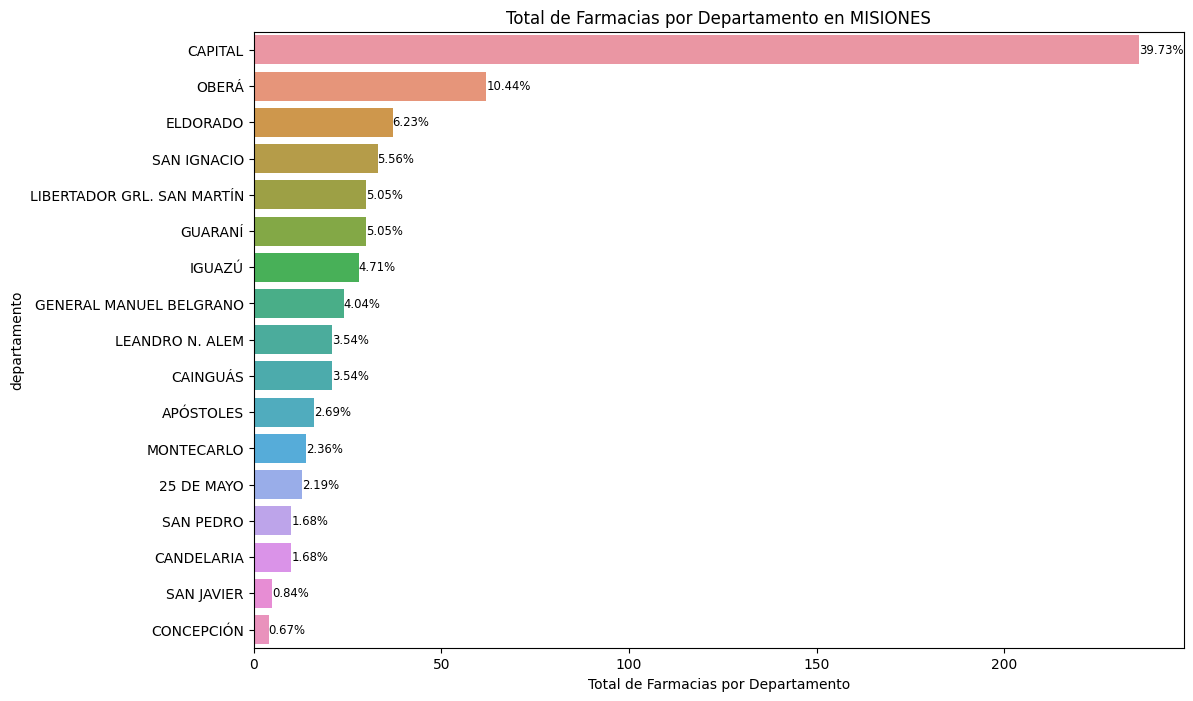

In [49]:
total_department_in_percent(province=misiones, figsize=(12,8))

# CÓRDOBA

In [50]:
cordoba = provinces[5]
cordoba

'CÓRDOBA'

In [51]:
df_cordoba = data_allprovinces[cordoba]
df_cordoba.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
4,70140142334991,VALENTINO,14,CÓRDOBA,14,CAPITAL,14014010000,CORDOBA,5000,Catamarca 1047,NaN
129,70140142333750,HP FARMA V,14,CÓRDOBA,14,CAPITAL,14014010000,CORDOBA,5000,Elías Yofre 1050,NaN
135,70140422333755,FARMAVIDA IX,14,CÓRDOBA,42,GENERAL SAN MARTÍN,14042170000,VILLA MARIA,5900,Sarmiento 1966,NaN
177,70140212333758,GRAMIGNA,14,CÓRDOBA,21,COLÓN,14021200000,MENDIOLAZA,5107,Avenida Martín Tissera 2997,NaN
178,70140142333759,GENERAL PAZ NUEVOCENTRO,14,CÓRDOBA,14,CAPITAL,14014010000,CORDOBA,5000,Avenida Duarte Quirós 1400,NaN


In [52]:
df_cordoba_by_departments = data_alldepartments[cordoba]
df_cordoba_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,295,52.12%
1,SAN JUSTO,38,6.71%
2,COLÓN,31,5.48%
3,PUNILLA,30,5.30%
4,GENERAL SAN MARTÍN,28,4.95%
5,RÍO CUARTO,25,4.42%
6,RÍO SEGUNDO,20,3.53%
7,SANTA MARÍA,16,2.83%
8,MARCOS JUÁREZ,11,1.94%
9,TERCERO ARRIBA,9,1.59%


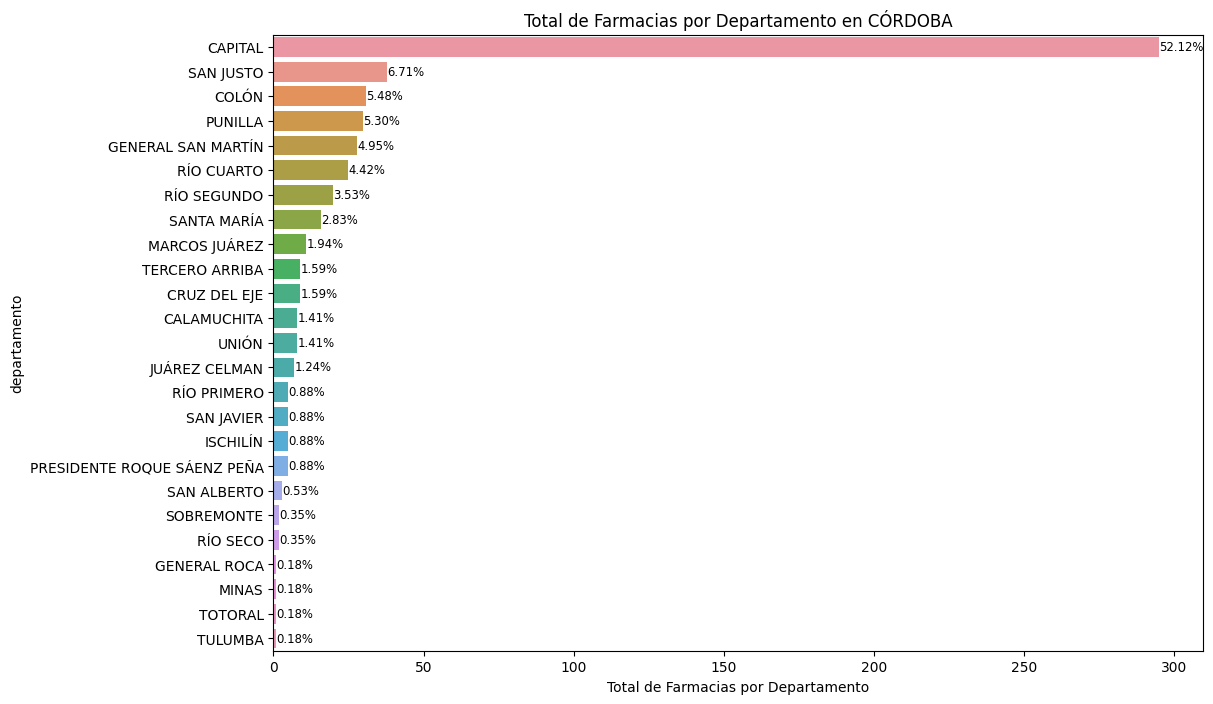

In [53]:
total_department_in_percent(province=cordoba, figsize=(12,8))

# ENTRE RÍOS

In [54]:
entre_rios = provinces[6]
entre_rios

'ENTRE RÍOS'

In [55]:
df_entre_rios = data_allprovinces[entre_rios]
df_entre_rios.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
7192,70300842342856,SARMIENTO II,30,ENTRE RÍOS,84,PARANÁ,30084070000,CRESPO,3116,25 DE MAYO 1017,NaN
7193,70300842342857,SELECTA,30,ENTRE RÍOS,84,PARANÁ,30084160000,PARANA,3100,AV. ZANNI 1301,NaN
7194,70300982342858,FCIA. ALBA,30,ENTRE RÍOS,98,URUGUAY,30098040000,CONCEPCION DEL URUGUAY,3260,9 de Julio 1302,NaN
7195,70300772342859,JORDAN,30,ENTRE RÍOS,77,NOGOYÁ,30077050000,HERNANDEZ,3156,SABA Z. HERNANDEZ 131,NaN
7196,70300152342860,SAN LORENZO,30,ENTRE RÍOS,15,CONCORDIA,30015060002,CONCORDIA,3200,Avenida Monseñor Tavella 1310,NaN


In [56]:
df_entre_rios_by_departments = data_alldepartments[entre_rios]
df_entre_rios_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,PARANÁ,140,28.63%
1,CONCORDIA,49,10.02%
2,URUGUAY,47,9.61%
3,GUALEGUAYCHÚ,39,7.98%
4,FEDERACIÓN,29,5.93%
5,COLÓN,29,5.93%
6,LA PAZ,25,5.11%
7,DIAMANTE,21,4.29%
8,VICTORIA,20,4.09%
9,GUALEGUAY,19,3.89%


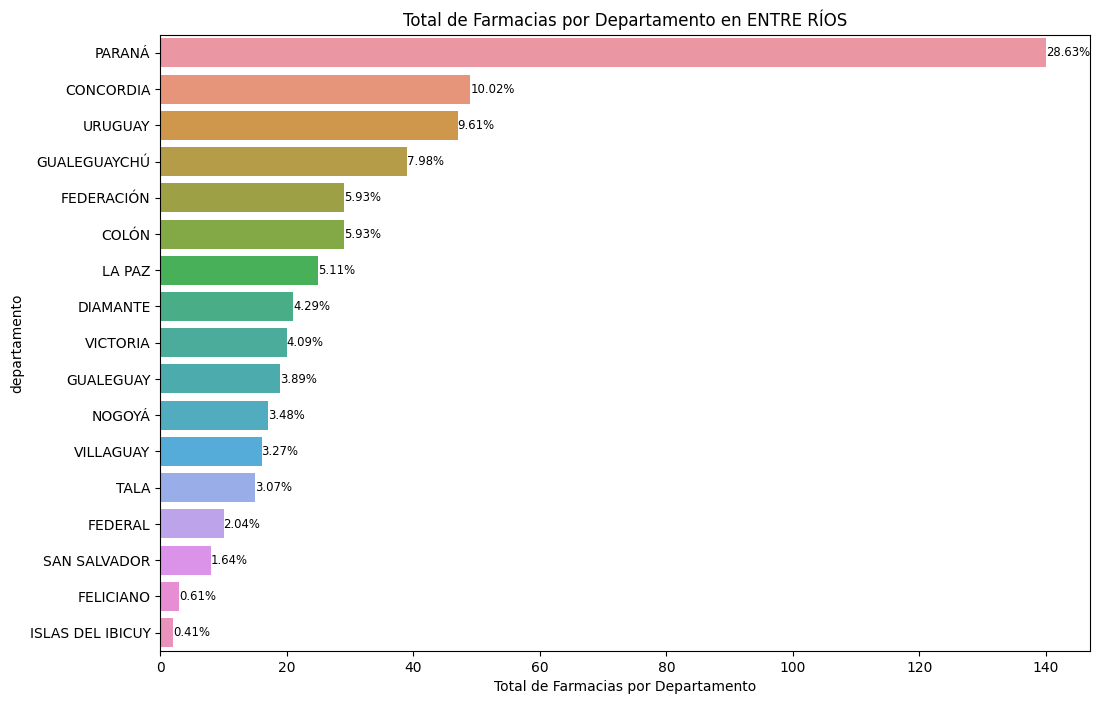

In [57]:
total_department_in_percent(province=entre_rios, figsize=(12,8))

# CHACO

In [58]:
chaco = provinces[7]
chaco

'CHACO'

In [59]:
df_chaco = data_allprovinces[chaco]
df_chaco.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
31,70221052327489,BOTIQUIN CLINICA REGIONAL SRL,22,CHACO,105,9 DE JULIO,22105010000,LAS BREÑAS,3722,RIVADAVIA 605,NaN
68,70220982326858,SAN ANTONIO,22,CHACO,98,MAYOR LUIS J. FONTANA,22098030000,VILLA ANGELA,3540,BELGRANO Y BALCARCE,NaN
93,70221402326731,CATEDRAL II,22,CHACO,140,SAN FERNANDO,22140060000,RESISTENCIA,3500,JUAN DOMINGO PERON 09,NaN
96,70221402326783,NUEVA RIOJA,22,CHACO,140,SAN FERNANDO,22140060000,RESISTENCIA,3500,REMEDIOS DE ESCALADA 575,NaN
100,70221402326789,FARMACIA WAL-MART,22,CHACO,140,SAN FERNANDO,22140060000,RESISTENCIA,3500,RUTA 11 Y AVENIDA MARCONI,NaN


In [60]:
df_chaco_by_departments = data_alldepartments[chaco]
df_chaco_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,SAN FERNANDO,134,31.46%
1,COMANDANTE FERNÁNDEZ,42,9.86%
2,MAYOR LUIS J. FONTANA,30,7.04%
3,GENERAL GÜEMES,24,5.63%
4,CHACABUCO,21,4.93%
5,LIBERTADOR GENERAL SAN MARTÍN,19,4.46%
6,9 DE JULIO,18,4.23%
7,QUITILIPI,16,3.76%
8,ALMIRANTE BROWN,15,3.52%
9,O'HIGGINS,14,3.29%


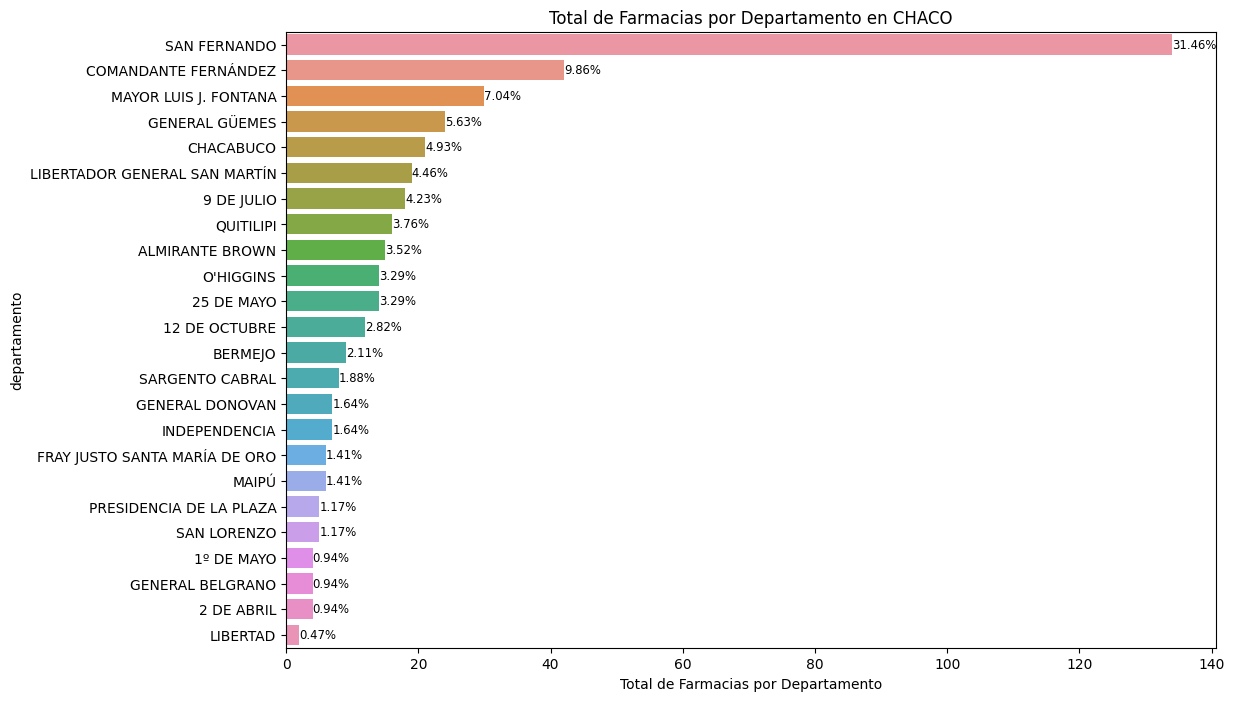

In [61]:
total_department_in_percent(province=chaco, figsize=(12,8))

# SALTA

In [62]:
salta = provinces[8]
salta

'SALTA'

In [63]:
df_salta = data_allprovinces[salta]
df_salta.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
8347,70660842373694,DEL ANGEL (EL TALA),66,SALTA,84,LA CANDELARIA,66084020000,EL TALA,1,GRAL.GUEMES 247,NaN
8348,70660282373695,REARTE ANDRES RAMON,66,SALTA,28,CAPITAL,66028050000,SALTA,1,9 DE JULIO 555,NaN
8349,70660282373696,SCHUEVERMANN SERGIO ENRIQUE,66,SALTA,28,CAPITAL,66028050000,SALTA,4400,LA RIOJA 383,NaN
8350,70660282373697,FERNANDEZ JOSE FLORENCIO,66,SALTA,28,CAPITAL,66028050000,SALTA,4400,INDEPENDENCIA 69,NaN
8351,70660282373698,CANIZARES MARCELO,66,SALTA,28,CAPITAL,66028050000,SALTA,1,SAN MARTIN 699,NaN


In [64]:
df_salta_by_departments = data_alldepartments[salta]
df_salta_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,204,60.53%
1,GRL. JOSÉ DE SAN MARTÍN,34,10.09%
2,ORÁN,24,7.12%
3,GENERAL GÜEMES,14,4.15%
4,ANTA,12,3.56%
5,METÁN,11,3.26%
6,ROSARIO DE LA FRONTERA,11,3.26%
7,CAFAYATE,6,1.78%
8,CHICOANA,6,1.78%
9,CERRILLOS,5,1.48%


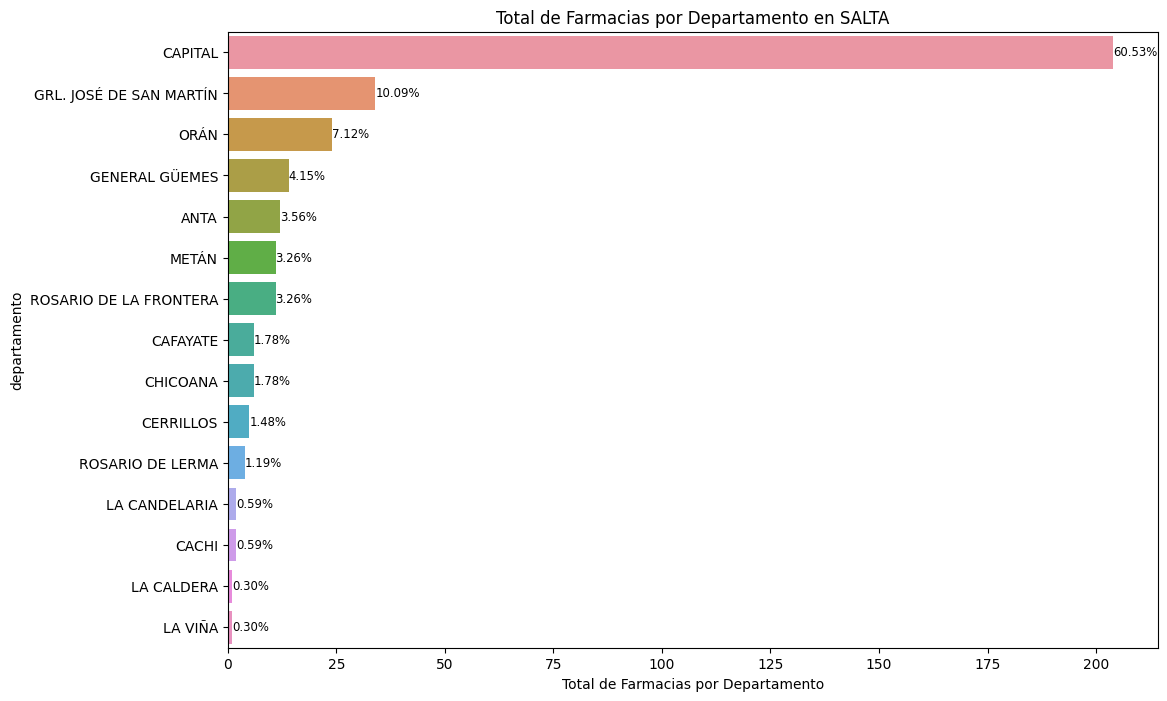

In [65]:
total_department_in_percent(province=salta, figsize=(12,8))

# CORRIENTES

In [66]:
corrientes = provinces[9]
corrientes

'CORRIENTES'

In [67]:
df_corrientes = data_allprovinces[corrientes]
df_corrientes.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
8293,70180212339925,SAN CAYETANO SCS,18,CORRIENTES,21,CAPITAL,18021020000,CORRIENTES,3400,AV. ARMENIA 3798,NaN
8294,70180212339926,DEL LITORAL SCS,18,CORRIENTES,21,CAPITAL,18021020000,CORRIENTES,3400,AV. CAZADORES CORRENTINOS 3862,NaN
8295,70180212339927,PIRAYUI,18,CORRIENTES,21,CAPITAL,18021020000,CORRIENTES,3400,BºPIRAYUI 200V.MZ.27 E CASA 39,NaN
8296,70181052339928,SAN JORGE,18,CORRIENTES,105,MERCEDES,18105030000,MERCEDES,3470,SARMIENTO 392,NaN
8297,70180212339929,CYAP S.C.S.,18,CORRIENTES,21,CAPITAL,18021020000,CORRIENTES,3400,AV. CENTENARIO 3960,NaN


In [68]:
df_corrientes_by_departments = data_alldepartments[corrientes]
df_corrientes_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,126,41.58%
1,SANTO TOMÉ,29,9.57%
2,GOYA,20,6.60%
3,MONTE CASEROS,14,4.62%
4,PASO DE LOS LIBRES,14,4.62%
5,CURUZÚ CUATIÁ,12,3.96%
6,MERCEDES,10,3.30%
7,BELLA VISTA,9,2.97%
8,ITUZAINGÓ,7,2.31%
9,SALADAS,6,1.98%


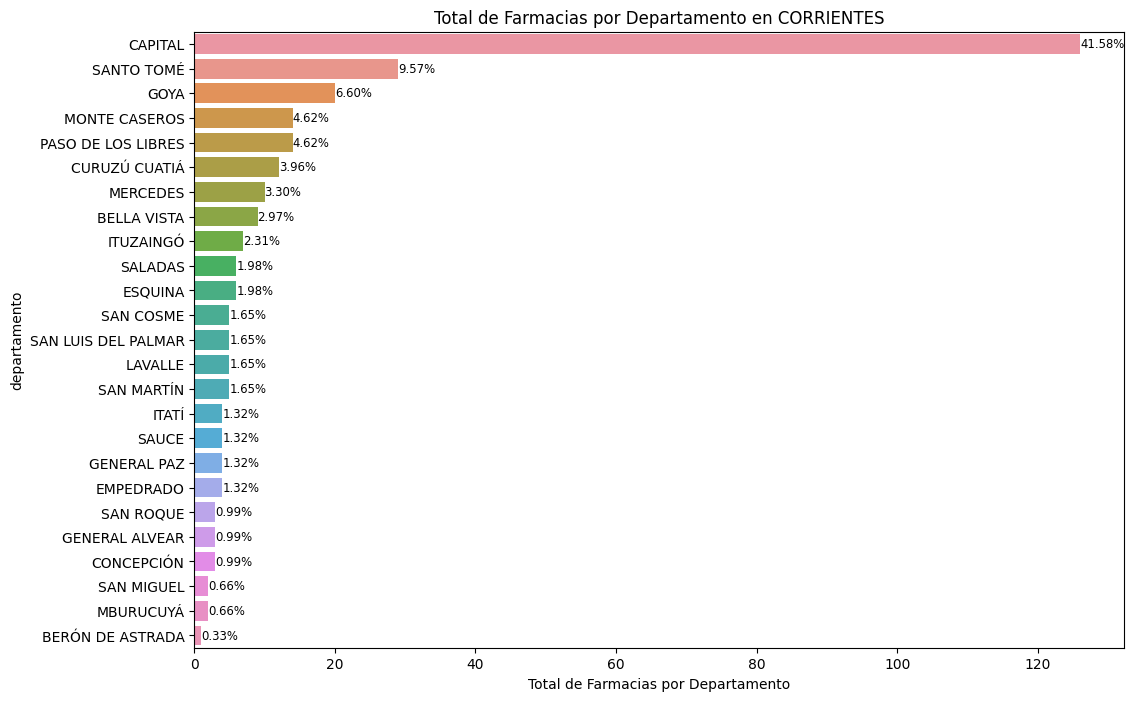

In [69]:
total_department_in_percent(province=corrientes, figsize=(12,8))

# RÍO NEGRO

In [70]:
rio_negro = provinces[10]
rio_negro

'RÍO NEGRO'

In [71]:
df_rio_negro = data_allprovinces[rio_negro]
df_rio_negro.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
1712,70620212370601,DEL PUEBLO,62,RÍO NEGRO,21,BARILOCHE,62021030000,EL BOLSON,7106,AVENIDA BELGRANO S/Nº,NaN
1815,70620212370564,BARBERIS,62,RÍO NEGRO,21,BARILOCHE,62021060000,SAN CARLOS DE BARILOCHE,8400,Onelli 377,NaN
1816,70620212370566,LOS ANDES,62,RÍO NEGRO,21,BARILOCHE,62021060000,SAN CARLOS DE BARILOCHE,8400,Avenida Exequiel Bustillo,NaN
1847,70620212370590,FARMACIA GALLARDO SCS,62,RÍO NEGRO,21,BARILOCHE,62021060000,SAN CARLOS DE BARILOCHE,8400,Avenida Angel Gallardo 218,NaN
1848,70620212370591,DR.LUNA LANZ,62,RÍO NEGRO,21,BARILOCHE,62021060000,SAN CARLOS DE BARILOCHE,8400,Onelli 1509,NaN


In [72]:
df_rio_negro_by_departments = data_alldepartments[rio_negro]
df_rio_negro_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,GENERAL ROCA,138,50.55%
1,BARILOCHE,58,21.25%
2,ADOLFO ALSINA,26,9.52%
3,SAN ANTONIO,19,6.96%
4,AVELLANEDA,14,5.13%
5,PICHI MAHUIDA,9,3.30%
6,25 DE MAYO,4,1.47%
7,CONESA,3,1.10%
8,VALCHETA,2,0.73%


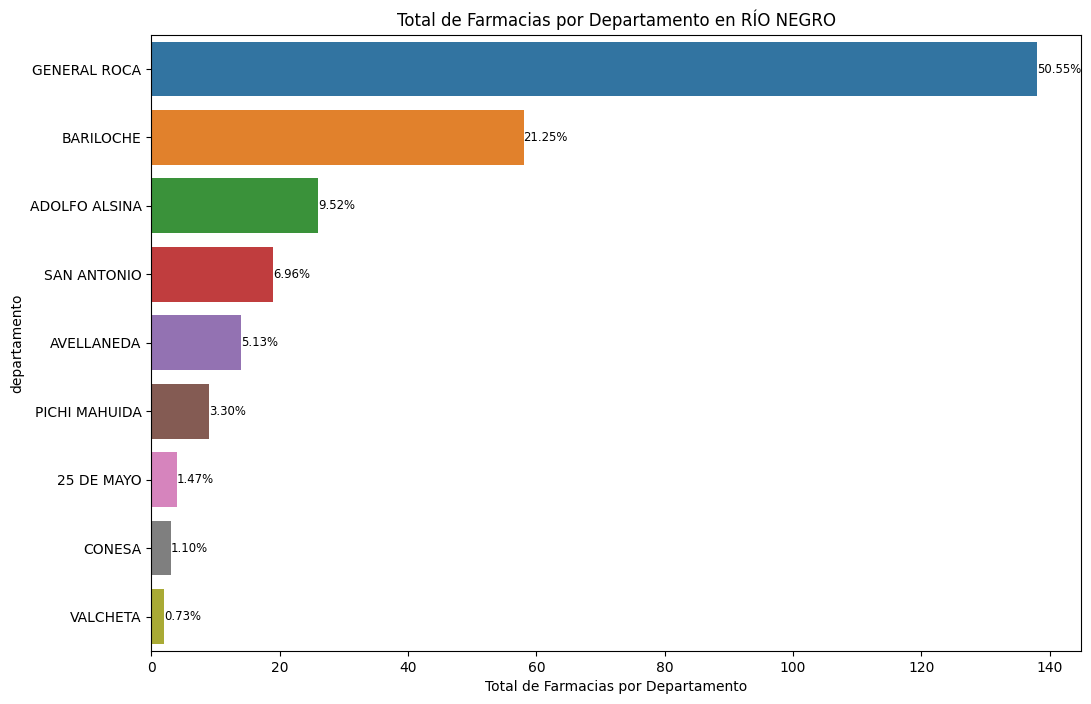

In [73]:
total_department_in_percent(province=rio_negro, figsize=(12,8))

# LA PAMPA

In [74]:
la_pampa = provinces[11]
la_pampa

'LA PAMPA'

In [75]:
df_la_pampa = data_allprovinces[la_pampa]
df_la_pampa.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
13,70421472353770,FARMACIA CHICO,42,LA PAMPA,147,TRENEL,42147030000,TRENEL,6369,ANTONIO DEVOTO 178,NaN
73,70421472353814,FARMACIA ACUARIO,42,LA PAMPA,147,TRENEL,42147010000,ARATA,6385,BELGRANO 259,NaN
74,70421052353815,FARMACIA VILLA MARGARITA,42,LA PAMPA,105,MARACÓ,42105030000,GENERAL PICO,6360,CALLE 20 Nº 401 (NORTE),NaN
75,70421052353840,FARMACIA DE LA CIUDAD,42,LA PAMPA,105,MARACÓ,42105030000,GENERAL PICO,6360,CALLE 5 Nº 672,NaN
78,70421052353901,FARMACIA GALERIA,42,LA PAMPA,105,MARACÓ,42105030000,GENERAL PICO,6360,CALLE 15 Nº 948,NaN


In [76]:
df_la_pampa_by_departments = data_alldepartments[la_pampa]
df_la_pampa_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,78,29.77%
1,MARACÓ,51,19.47%
2,REALICÓ,18,6.87%
3,CONHELO,14,5.34%
4,GUATRACHÉ,12,4.58%
5,UTRACÁN,11,4.20%
6,ATREUCÓ,11,4.20%
7,RANCUL,11,4.20%
8,CHAPALEUFÚ,11,4.20%
9,QUEMÚ QUEMÚ,9,3.44%


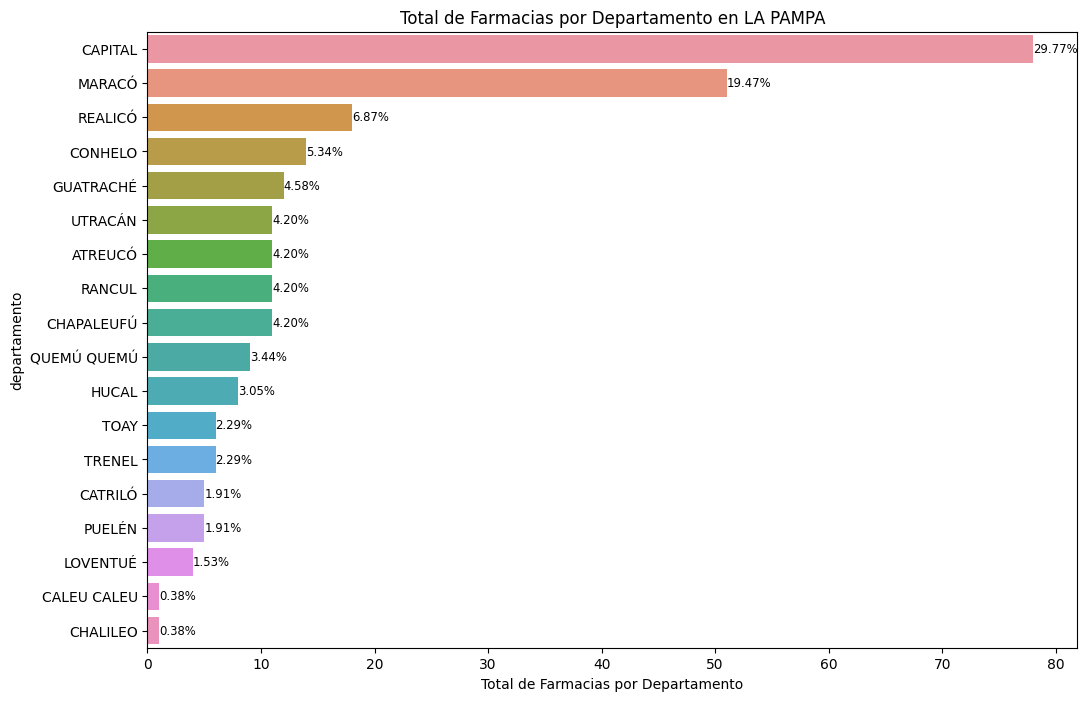

In [77]:
total_department_in_percent(province=la_pampa, figsize=(12,8))

# SANTIAGO DEL ESTERO

In [78]:
santiago_del_estero = provinces[12]
santiago_del_estero

'SANTIAGO DEL ESTERO'

In [79]:
df_santiago_del_este = data_allprovinces[santiago_del_estero]
df_santiago_del_este.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
8591,70860632393055,B Y F,86,SANTIAGO DEL ESTERO,63,CHOYA,86063040000,FRIAS,4230,Catamarca 436,NaN
8592,70860492393116,SAN ROQUE,86,SANTIAGO DEL ESTERO,49,CAPITAL,86049110000,SANTIAGO DEL ESTERO,4200,LA PLATA 1107,NaN
8593,70860352393117,RIVADAVIA,86,SANTIAGO DEL ESTERO,35,BANDA,86035090000,LA BANDA,4200,RIVADAVIA 117,NaN
8594,70860492393118,SOCIAL BELGRANO,86,SANTIAGO DEL ESTERO,49,CAPITAL,86049110000,SANTIAGO DEL ESTERO,4200,PEDRO L. GALLO 12,NaN
8595,70860492393119,MORENO,86,SANTIAGO DEL ESTERO,49,CAPITAL,86049110000,SANTIAGO DEL ESTERO,4200,Avenida Moreno Norte 12,NaN


In [80]:
df_santiago_del_estero_by_departments = data_alldepartments[santiago_del_estero]
df_santiago_del_estero_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,114,45.42%
1,BANDA,28,11.16%
2,RÍO HONDO,21,8.37%
3,CHOYA,20,7.97%
4,GENERAL TABOADA,14,5.58%
5,ROBLES,9,3.59%
6,COPO,7,2.79%
7,MORENO,6,2.39%
8,BELGRANO,5,1.99%
9,LORETO,4,1.59%


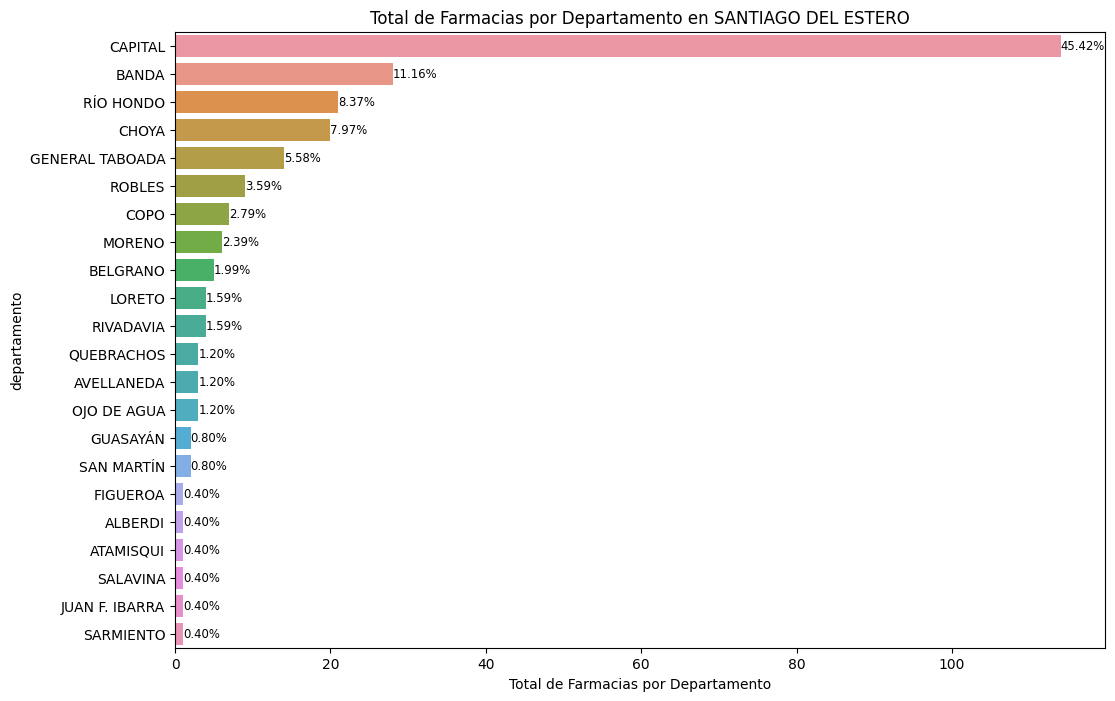

In [81]:
total_department_in_percent(province=santiago_del_estero, figsize=(12,8))

# SAN LUIS

In [82]:
san_luis = provinces[13]
san_luis

'SAN LUIS'

In [83]:
df_san_luis = data_allprovinces[san_luis]
df_san_luis.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
149,70740562380302,ARGENTINA,74,SAN LUIS,56,LA CAPITAL,74056150000,SAN LUIS,5700,PRINGLES Nº 831,NaN
151,70740072380304,MARYMEN,74,SAN LUIS,7,AYACUCHO,74007070000,SAN FRANCISCO DEL MONTE DE ORO,5705,AVENIDA SARMIENTO Nº 626,NaN
154,70740562380311,CORTEZ,74,SAN LUIS,56,LA CAPITAL,74056150000,SAN LUIS,5700,"BARRIO 151 VIVIENDAS, MANZANA 467, CASA 8",NaN
155,70740072380313,ALCIBAR-ZAKIEL,74,SAN LUIS,7,AYACUCHO,74007050000,QUINES,5711,PRINGLES Nº 509,NaN
156,70740562380316,DEL OESTE,74,SAN LUIS,56,LA CAPITAL,74056150000,SAN LUIS,5700,BOLIVAR Y FALUCHO,NaN


In [84]:
df_san_luis_by_departments = data_alldepartments[san_luis]
df_san_luis_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,LA CAPITAL,119,50.00%
1,GENERAL PEDERNERA,63,26.47%
2,JUNÍN,19,7.98%
3,CHACABUCO,13,5.46%
4,AYACUCHO,11,4.62%
5,GOBERNADOR DUPUY,7,2.94%
6,CORONEL PRINGLES,5,2.10%
7,LIBERTADOR GENERAL SAN MARTÍN,1,0.42%


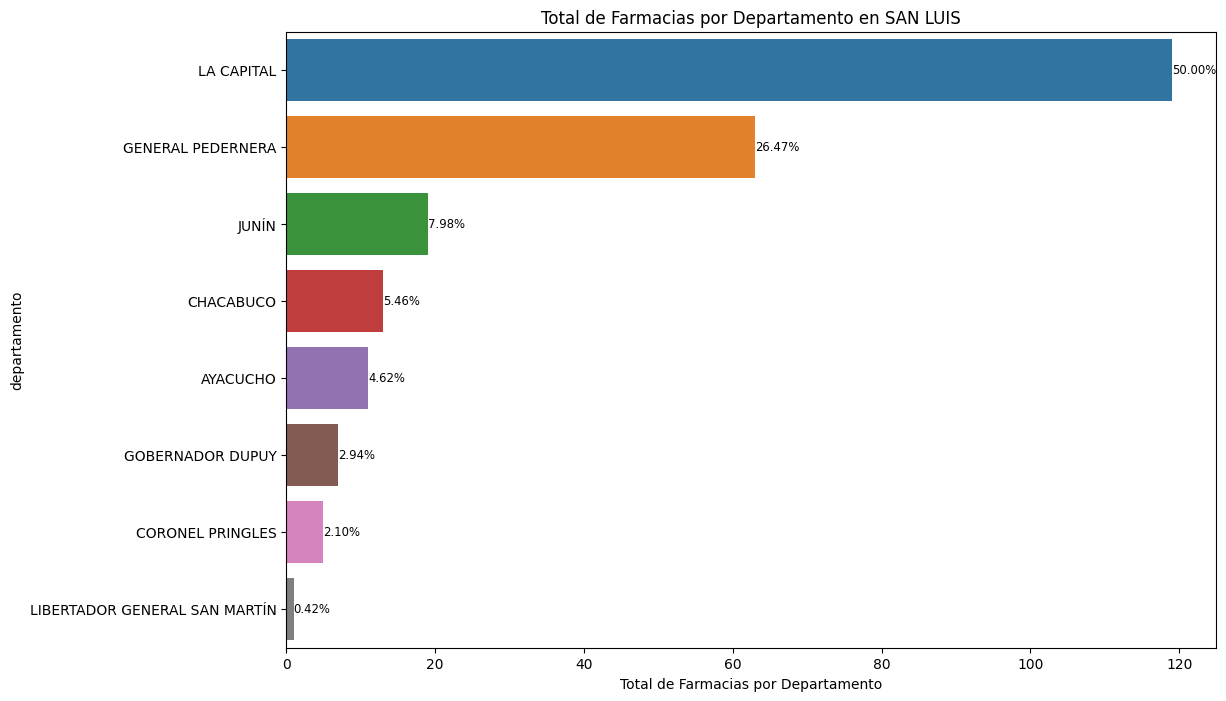

In [85]:
total_department_in_percent(province=san_luis, figsize=(12,8))

# SAN JUAN


In [86]:
san_juan = provinces[14]
san_juan

'SAN JUAN'

In [87]:
df_san_juan = data_allprovinces[san_juan]
df_san_juan.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
7224,70700982377596,DIFUNTA CORREA,70,SAN JUAN,98,SANTA LUCÍA,70098010003,SANTA LUCIA,5411,AVENIDA LIBERTADOR ESTE 1893,NaN
7225,70700772377597,NUEVA BAHIA BLANCA,70,SAN JUAN,77,RAWSON,70077010002,RAWSON,5425,Liniers 2510 (Oeste),NaN
7226,70700982377598,COLON,70,SAN JUAN,98,SANTA LUCÍA,70098010003,SANTA LUCIA,5411,COLON ESQUINA RIVADAVIA,NaN
7227,70700772377600,MERCEDARIO,70,SAN JUAN,77,RAWSON,70077010002,RAWSON,5425,MENDOZA SUR 1393,NaN
7228,70700772377601,SAN ARCANGEL,70,SAN JUAN,77,RAWSON,70077010002,RAWSON,5425,REPUBLICA DEL LIBANO OESTE 1388,NaN


In [88]:
df_san_juan_by_departments = data_alldepartments[san_juan]
df_san_juan_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,95,41.67%
1,RAWSON,34,14.91%
2,RIVADAVIA,25,10.96%
3,SANTA LUCÍA,13,5.70%
4,POCITO,9,3.95%
5,CAUCETE,8,3.51%
6,CHIMBAS,7,3.07%
7,ALBARDÓN,6,2.63%
8,SAN MARTÍN,6,2.63%
9,JÁCHAL,6,2.63%


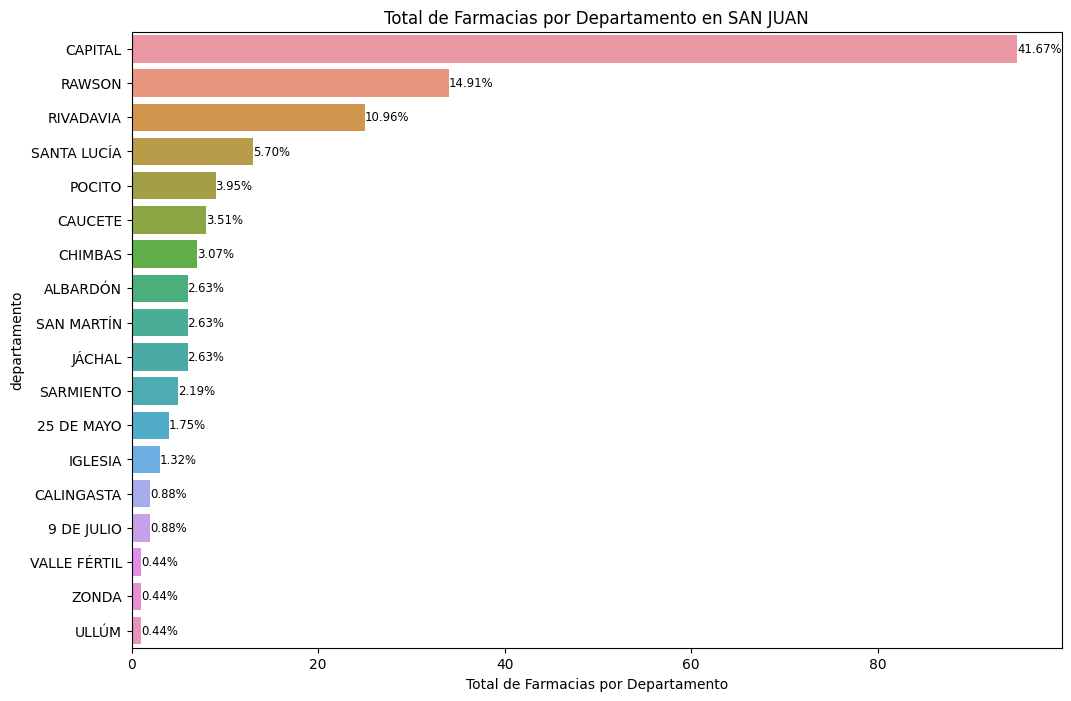

In [89]:
total_department_in_percent(province=san_juan, figsize=(12,8))

# NEUQUÉN


In [90]:
neuquen = provinces[15]
neuquen

'NEUQUÉN'

In [91]:
df_neuquen = data_allprovinces[neuquen]
df_neuquen.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
76,70580562367339,FARMACIA JACHAL,58,NEUQUÉN,56,LÁCAR,58056010000,SAN MARTIN DE LOS ANDES,8316,AVENIDA KOESSLER 2116,NaN
95,70580353067340,FARMACIA COOPERATIVA COPELCO LIMITADA,58,NEUQUÉN,35,CONFLUENCIA,58035040000,CUTRAL CO,3363,AVENIDA GENERAL PAZ 250,NaN
102,70580352367394,FARMACIA SAN JORGE,58,NEUQUÉN,35,CONFLUENCIA,58035070000,NEUQUEN,8300,LAINEZ 774,NaN
103,70580912367395,FARMACIA SAN JOSE,58,NEUQUÉN,91,PEHUENCHES,58091040000,RINCON DE LOS SAUCES,8353,MISIONES 204,NaN
104,70580352367396,FARMACIA SAN JUDAS,58,NEUQUÉN,35,CONFLUENCIA,58035070000,NEUQUEN,8300,CHOCON 436,NaN


In [92]:
df_neuquen_by_departments = data_alldepartments[neuquen]
df_neuquen_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CONFLUENCIA,122,63.54%
1,LÁCAR,14,7.29%
2,ZAPALA,10,5.21%
3,PEHUENCHES,9,4.69%
4,LOS LAGOS,8,4.17%
5,HUILICHES,5,2.60%
6,ÑORQUÍN,5,2.60%
7,CHOS MALAL,4,2.08%
8,AÑELO,4,2.08%
9,MINAS,3,1.56%


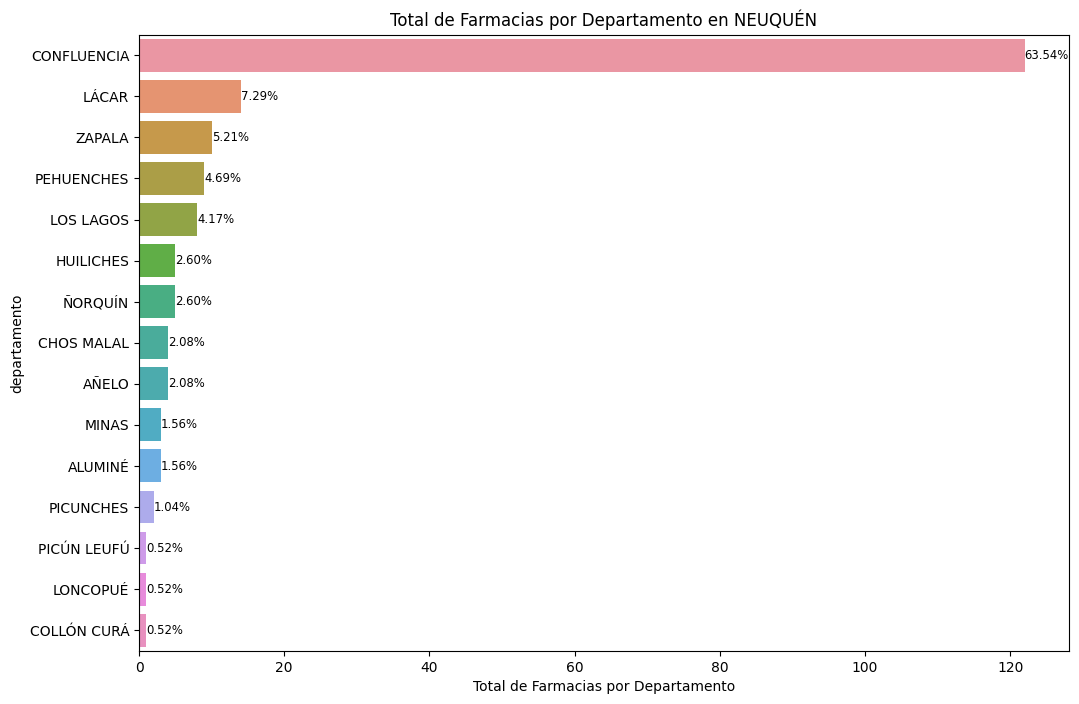

In [93]:
total_department_in_percent(province=neuquen, figsize=(12,8))

# CHUBUT


In [94]:
chubut = provinces[16]
chubut

'CHUBUT'

In [95]:
df_chubut = data_allprovinces[chubut]
df_chubut.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
0,70260072329721,PUJOL,26,CHUBUT,7,BIEDMA,26007020000,PUERTO MADRYN,9120,LOS MAITENES 1538,NaN
26,70260212329663,MAGISTRAL RODRIGUEZ,26,CHUBUT,21,ESCALANTE,26021030018,COMODORO RIVADAVIA,9000,Colonos Galeses 2183,NaN
202,70260772329402,DEL CENTRO,26,CHUBUT,77,RAWSON,26077030000,RAWSON,9103,Mariano Moreno 574,NaN
203,70260772329403,AUTOFARMA RW,26,CHUBUT,77,RAWSON,26077030000,RAWSON,9103,Avenida 25 de Mayo 219,NaN
204,70260772329406,DE LA BAHIA,26,CHUBUT,77,RAWSON,26077020,PLAYA UNIÓN (PUERTO RAWSON),9103,JUAN MANUEL DE ROSAS N ° 215,NaN


In [96]:
df_chubut_by_departments = data_alldepartments[chubut]
df_chubut_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,ESCALANTE,71,38.38%
1,RAWSON,39,21.08%
2,BIEDMA,30,16.22%
3,FUTALEUFÚ,16,8.65%
4,CUSHAMEN,11,5.95%
5,GAIMAN,6,3.24%
6,SARMIENTO,3,1.62%
7,RÍO SENGUER,3,1.62%
8,TEHUELCHES,3,1.62%
9,MÁRTIRES,1,0.54%


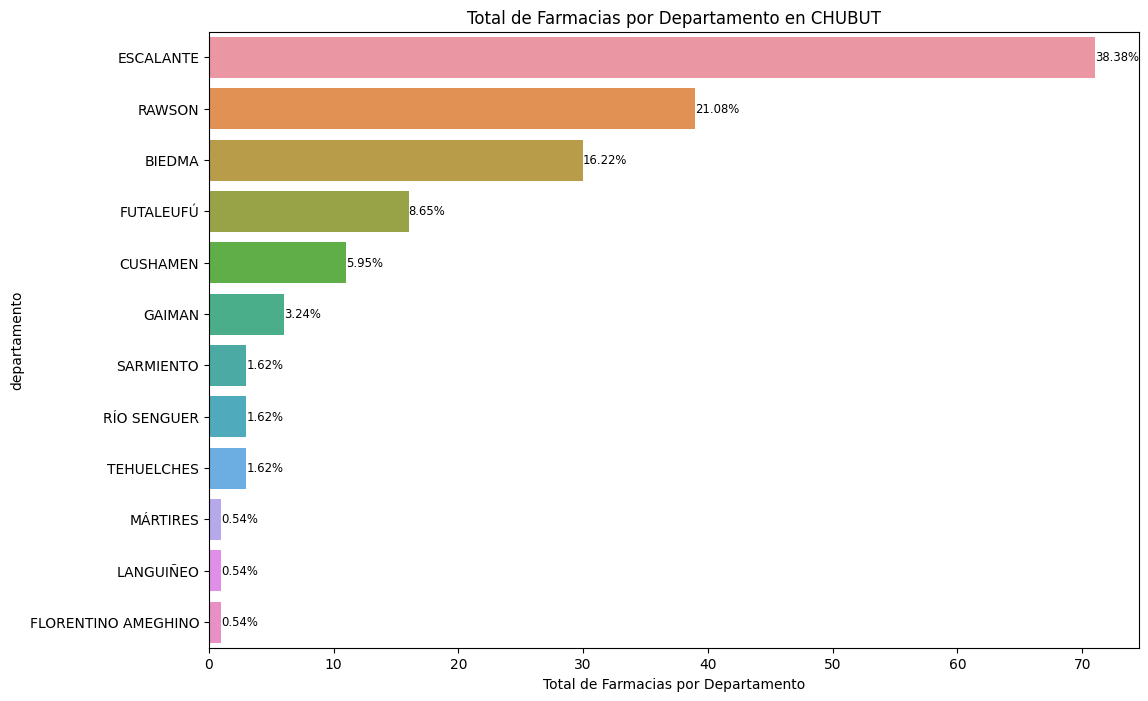

In [97]:
total_department_in_percent(province=chubut, figsize=(12,8))

# JUJUY


In [98]:
jujuy = provinces[17]
jujuy

'JUJUY'

In [99]:
df_jujuy = data_allprovinces[jujuy]
df_jujuy.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
4624,70380632350602,NUEVA ALBERDI,38,JUJUY,63,SAN PEDRO,38063180000,SAN PEDRO,4500,Juan Bautista Alberdi 174,NaN
4625,70380632350603,ANCONA,38,JUJUY,63,SAN PEDRO,38063180000,SAN PEDRO,4500,Juan Bautista Alberdi 243,NaN
4626,70380632350604,ANGHELY,38,JUJUY,63,SAN PEDRO,38063180000,SAN PEDRO,4500,AVDA. JUJUY 373,NaN
4627,70380632350605,CENTRAL,38,JUJUY,63,SAN PEDRO,38063180000,SAN PEDRO,4500,VELEZ SARFIELD 196,NaN
4628,70380632350606,COSENTINI,38,JUJUY,63,SAN PEDRO,38063180000,SAN PEDRO,4500,ROGELIO LEACH 101,NaN


In [100]:
df_jujuy_by_departments = data_alldepartments[jujuy]
df_jujuy_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,DR. MANUEL BELGRANO,84,45.65%
1,EL CARMEN,27,14.67%
2,SAN PEDRO,26,14.13%
3,LEDESMA,23,12.50%
4,PALPALÁ,12,6.52%
5,YAVI,5,2.72%
6,HUMAHUACA,3,1.63%
7,TILCARA,2,1.09%
8,COCHINOCA,2,1.09%


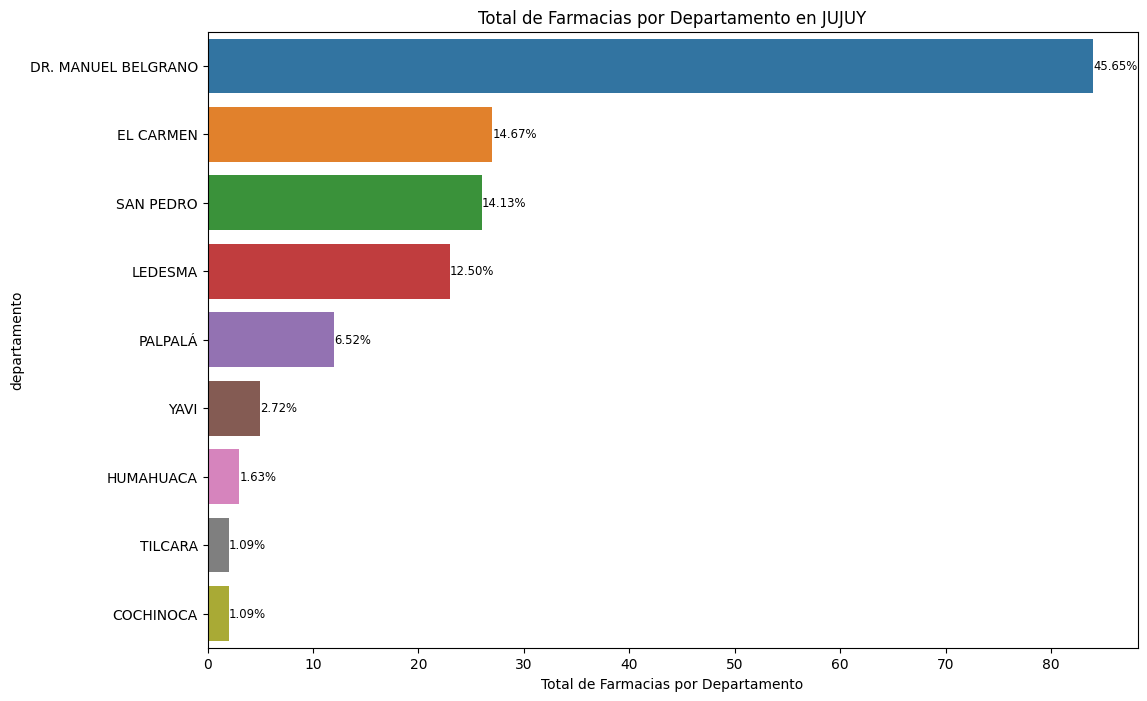

In [101]:
total_department_in_percent(province=jujuy, figsize=(12,8))

# CATAMARCA


In [102]:
catamarca = provinces[18]
catamarca

'CATAMARCA'

In [103]:
df_catamarca = data_allprovinces[catamarca]
df_catamarca.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
1,70100352324743,SALUDFARMA,10,CATAMARCA,35,BELÉN,10035020000,BELEN,4750,Mitre 14,NaN
12,70100352124818,BOTIQUIN OSEP BELEN,10,CATAMARCA,35,BELÉN,10035020000,BELEN,4750,Sarmiento 386,NaN
14,70100492324465,VITAL,10,CATAMARCA,49,CAPITAL,10049050,CAPITAL,4700,AV. SANCHEZ OVIEDO Nº1047,NaN
34,70100492324451,FARMAGEN,10,CATAMARCA,49,CAPITAL,10049050,CAPITAL,4700,Guemes 307,NaN
53,70100492324460,SALTA,10,CATAMARCA,49,CAPITAL,10049050,CAPITAL,4700,CHACABUCO Nº 687,NaN


In [104]:
df_catamarca_by_departments = data_alldepartments[catamarca]
df_catamarca_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,73,40.56%
1,TINOGASTA,15,8.33%
2,SANTA MARÍA,14,7.78%
3,BELÉN,13,7.22%
4,ANDALGALÁ,12,6.67%
5,LA PAZ,12,6.67%
6,VALLE VIEJO,9,5.00%
7,POMÁN,8,4.44%
8,SANTA ROSA,7,3.89%
9,CAPAYÁN,5,2.78%


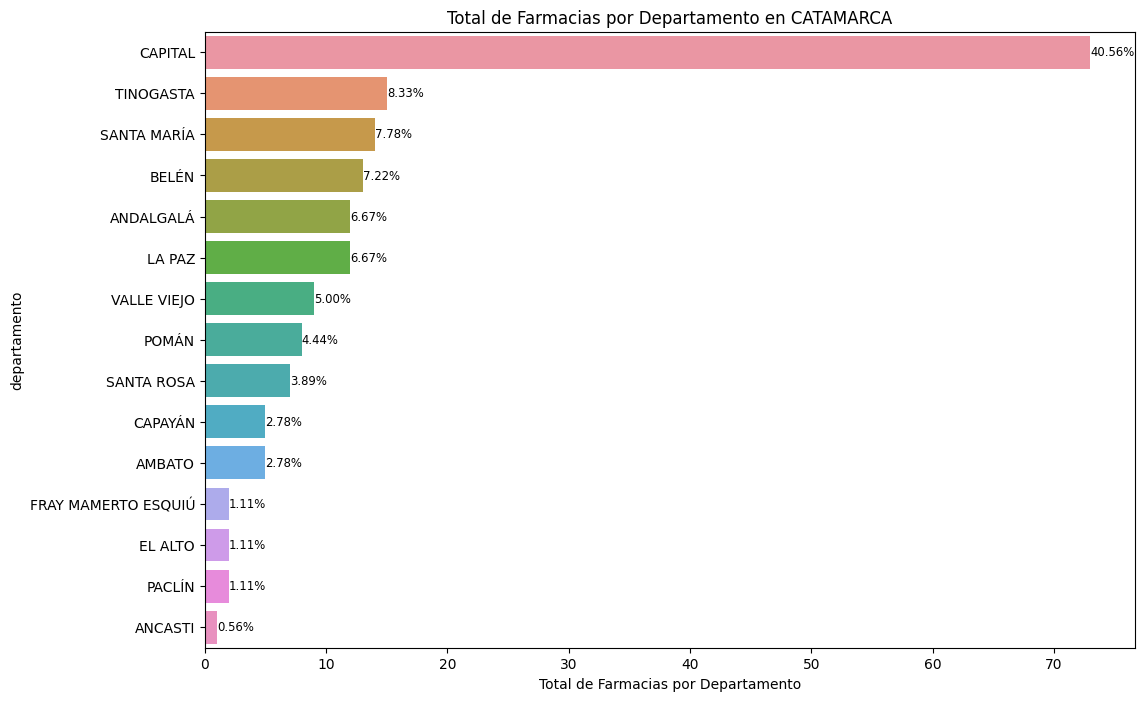

In [105]:
total_department_in_percent(province=catamarca, figsize=(12,8))

# FORMOSA


In [106]:
formosa = provinces[19]
formosa

'FORMOSA'

In [107]:
df_formosa = data_allprovinces[formosa]
df_formosa.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
3,70340492347884,PERALTA HNOS,34,FORMOSA,49,PILCOMAYO,34049010000,CLORINDA,3610,Avenida San Martin 470,NaN
11,70340282347858,JUAREZ,34,FORMOSA,28,MATACOS,34028010000,INGENIERO GUILLERMO N. JUAREZ,3636,calle Saavedra y Tucumán,NaN
9571,70340492347860,INSFRAN,34,FORMOSA,49,PILCOMAYO,34049020000,LAGUNA BLANCA,3613,calle Aldo Bollini y Sorrento Critelli,NaN
9593,70340492347840,LUCY-MAR,34,FORMOSA,49,PILCOMAYO,34049010000,CLORINDA,3610,Avenida San Martín 1221,NaN
9594,70340492347856,SAN CARLOS ANEXO I,34,FORMOSA,49,PILCOMAYO,34049010000,CLORINDA,3610,Avenida San Martín 449,NaN


In [108]:
df_formosa_by_departments = data_alldepartments[formosa]
df_formosa_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,FORMOSA,79,48.77%
1,PILCOMAYO,41,25.31%
2,PIRANÉ,23,14.20%
3,PATIÑO,14,8.64%
4,MATACOS,3,1.85%
5,PILAGÁS,2,1.23%


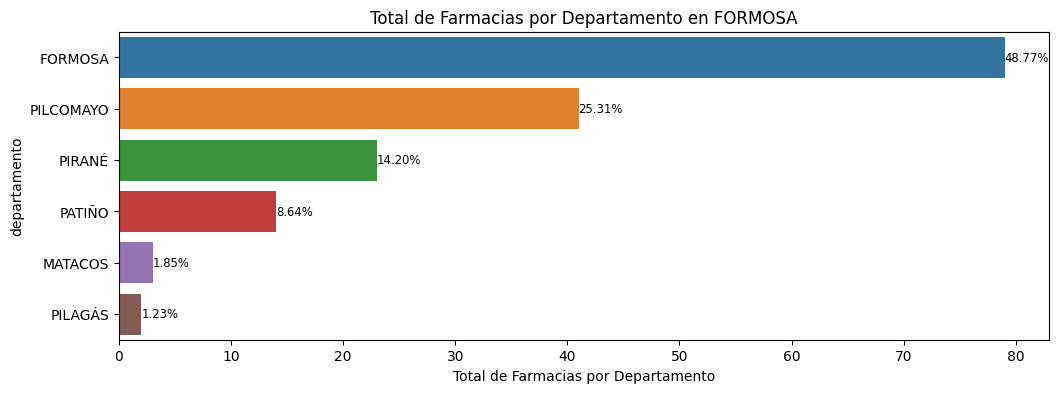

In [109]:
total_department_in_percent(province=formosa, figsize=(12,4))

# LA RIOJA


In [110]:
la_rioja = provinces[20]
la_rioja

'LA RIOJA'

In [111]:
df_la_rioja = data_allprovinces[la_rioja]
df_la_rioja.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
9,70460142355640,FARMACIA CLINICA AVIAT S.R.L,46,LA RIOJA,14,CAPITAL,46014010000,LA RIOJA,5300,Benjamín de la Vega 21,NaN
10,70460142355641,FARMACIA COLEGIO MEDICO,46,LA RIOJA,14,CAPITAL,46014010000,LA RIOJA,5300,Avenida Facundo Quiroga 430,NaN
15,70460142355625,FARMASUAR- SUCURSAL 1,46,LA RIOJA,14,CAPITAL,46014010000,LA RIOJA,5300,Av. San Nicolas de Bari N° 1255,NaN
16,70460142355626,FARMANOR S.R.L,46,LA RIOJA,14,CAPITAL,46014010000,LA RIOJA,5300,Avenida San Francisco N° 600- Barrio Cochangas...,NaN
21,70460142355629,NOVOFARMA,46,LA RIOJA,14,CAPITAL,46014010000,LA RIOJA,5300,Virgen de Itati esqina Santo Domingo,NaN


In [112]:
df_la_rioja_by_departments = data_alldepartments[la_rioja]
df_la_rioja_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,103,66.45%
1,CHILECITO,15,9.68%
2,ARAUCO,9,5.81%
3,CHAMICAL,8,5.16%
4,ROSARIO VERA PEÑALOZA,4,2.58%
5,CASTRO BARROS,3,1.94%
6,FAMATINA,3,1.94%
7,GENERAL BELGRANO,3,1.94%
8,GENERAL OCAMPO,2,1.29%
9,GENERAL SAN MARTÍN,2,1.29%


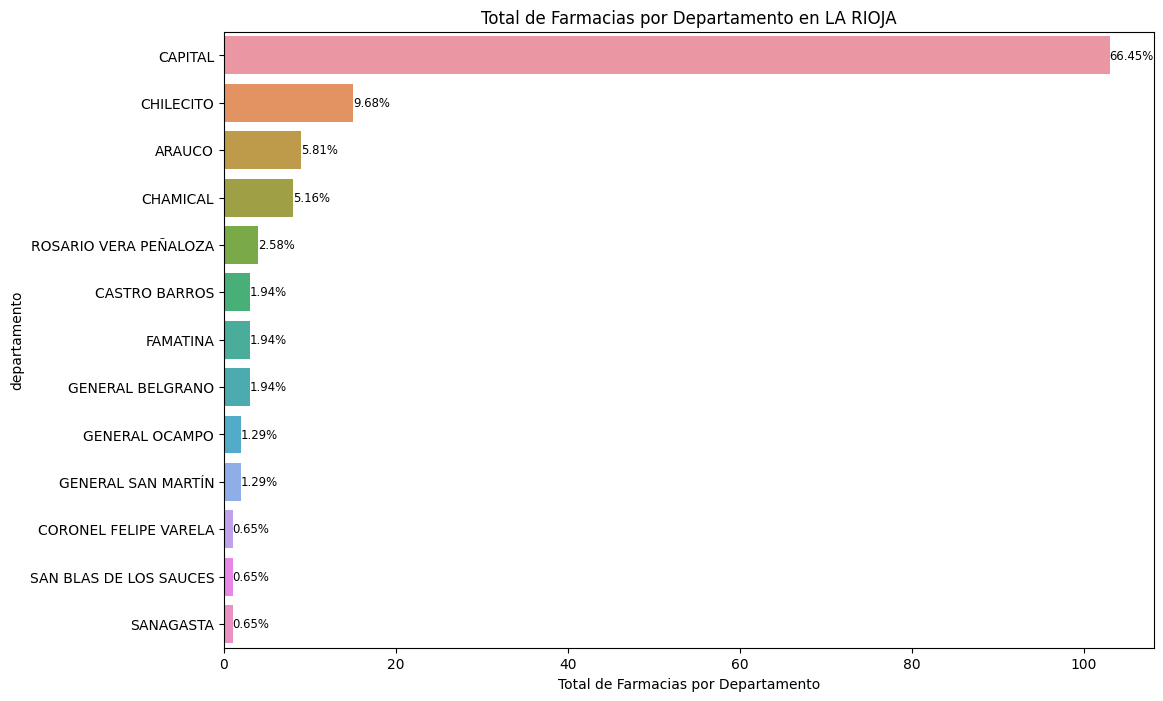

In [113]:
total_department_in_percent(province=la_rioja, figsize=(12,8))

# SANTA CRUZ


In [114]:
santa_cruz = provinces[21]
santa_cruz

'SANTA CRUZ'

In [115]:
df_santa_cruz = data_allprovinces[santa_cruz]
df_santa_cruz.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
97,70780142383280,FARMACIA DEL PUEBLO,78,SANTA CRUZ,14,DESEADO,78014060000,LAS HERAS,9017,28 DE NOVIEMBRE ESQUINA JUAN LARREA,NaN
98,70780142383281,FARMACIA DON BOSCO,78,SANTA CRUZ,14,DESEADO,78014060000,LAS HERAS,9017,GOBERNADOR GREGORES Nº 540,NaN
99,70780282383291,FARMACIA AUTOFARMA LIBERTADOR,78,SANTA CRUZ,28,LAGO ARGENTINO,78028010000,EL CALAFATE,9050,AVENIDA LIBERTADOR Y ESPORA,NaN
169,70780142383283,FARMACIA DEL BARRIO,78,SANTA CRUZ,14,DESEADO,78014060000,LAS HERAS,9017,GUEMES Y PASAJE GIUSEPPE MANZANA,NaN
221,70780212383242,FARMACIA NUEVA REAL,78,SANTA CRUZ,21,GÜER AIKE,78021040000,RIO GALLEGOS,9400,AVENIDA JUAN DOMINGO PERON Nº 675,NaN


In [116]:
df_santa_cruz_by_departments = data_alldepartments[santa_cruz]
df_santa_cruz_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,GÜER AIKE,33,35.48%
1,DESEADO,32,34.41%
2,LAGO ARGENTINO,9,9.68%
3,CORPEN AIKE,7,7.53%
4,LAGO BUENOS AIRES,7,7.53%
5,MAGALLANES,3,3.23%
6,RÍO CHICO,2,2.15%


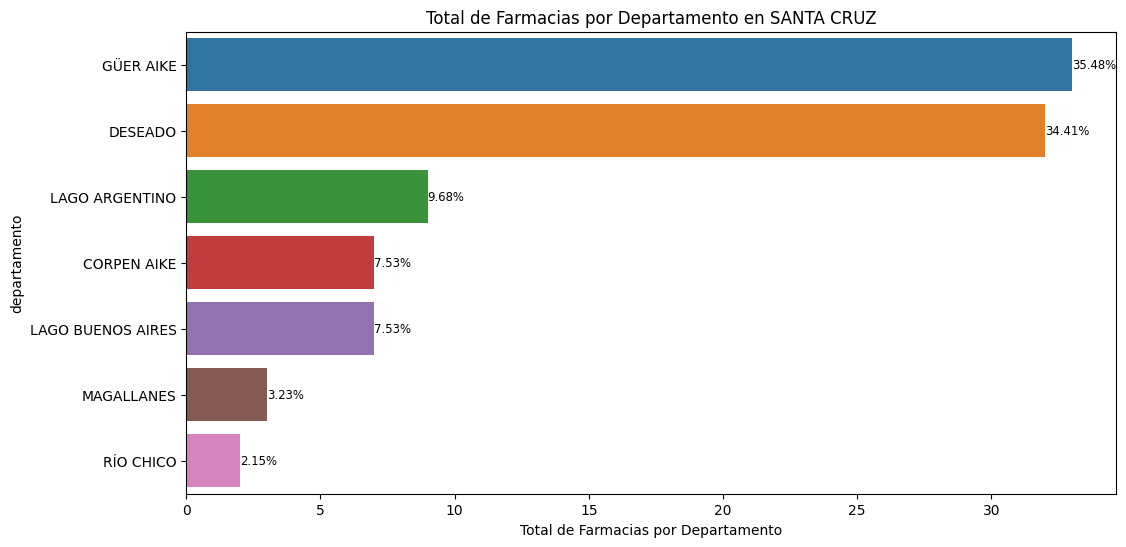

In [117]:
total_department_in_percent(province=santa_cruz, figsize=(12,6))

# TIERRA DEL FUEGO


In [118]:
tierra_del_fuego = provinces[22]
tierra_del_fuego

'TIERRA DEL FUEGO'

In [119]:
df_tierra_del_fuego = data_allprovinces[tierra_del_fuego]
df_tierra_del_fuego.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
72,70940072395121,FARMACIA ONIKEN,94,TIERRA DEL FUEGO,7,RÍO GRANDE,94007010000,RIO GRANDE,9420,Rosales 416,NaN
81,70940142395152,FARMACIA JAINEN,94,TIERRA DEL FUEGO,14,USHUAIA,94014020000,USHUAIA,9410,JAINEN Nº 152,NaN
82,70940142395153,FARMACIA AUTOFARMA,94,TIERRA DEL FUEGO,14,USHUAIA,94014020000,USHUAIA,9410,SAN MARTIN Nº 1336,NaN
92,70940072395116,FARMACIA DEL SUR,94,TIERRA DEL FUEGO,7,RÍO GRANDE,94007010000,RIO GRANDE,9420,20 de Junio 793,NaN
107,70940142495150,FARMACIA I.O.S.F.A. USHUAIA,94,TIERRA DEL FUEGO,14,USHUAIA,94014020000,USHUAIA,9410,YAGANES Nº 251,NaN


In [120]:
df_tierra_del_fuego_by_departments = data_alldepartments[tierra_del_fuego]
df_tierra_del_fuego_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,USHUAIA,32,51.61%
1,RÍO GRANDE,30,48.39%


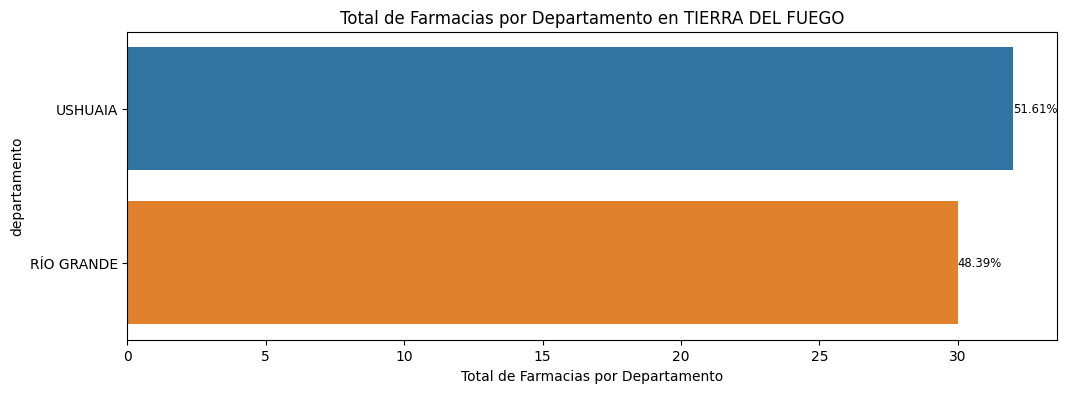

In [121]:
total_department_in_percent(province=tierra_del_fuego, figsize=(12,4))

# MENDOZA

In [122]:
mendoza = provinces[23]
mendoza

'MENDOZA'

In [123]:
df_mendoza = data_allprovinces[mendoza]
df_mendoza.head()

,id,nombre,id_provincia,provincia,id_departamento,departamento,id_localidad,localidad,codigo postal,domicilio,webpage
13031,70500072161016,SISTEMA DE SEGURIDAD SOCIAL DE LA SALUD FARMAC...,50,MENDOZA,7,CAPITAL,50007010002,2A. SECCION,5500,SAN JUAN 255,www.salud.mendoza.gov.ar/dependencias/incluir/
13038,70500072361012,DEL PLATA 3 FARMACIA.-,50,MENDOZA,7,CAPITAL,50007010005,5A. SECCION,5500,PASO DE LOS ANDES 95,www.farmaciasdelplata.com
13039,70500772361009,MALARGUE 1 FARMACIA.-,50,MENDOZA,77,MALARGÜE,50077040000,MALARGUE,5613,GENERAL VILLEGAS OESTE 7,NaN
13056,70500072861022,A.M.P.E.S. FARMACIA.-,50,MENDOZA,7,CAPITAL,50007010003,3A. SECCION,5500,SAN JUAN 871,www.asistir.net
13064,70500072761023,A.M.E.CO.M. 2 FARMACIA.-,50,MENDOZA,7,CAPITAL,50007010002,2A. SECCION,5500,AVENIDA SAN MARTÍN 53,NaN


In [124]:
df_mendoza_by_departments = data_alldepartments[mendoza]
df_mendoza_by_departments

,Departamentos,Total de Farmacias por Departamentos,% Total de Farmacias por Departamentos
0,CAPITAL,16,51.61%
1,SAN MARTÍN,3,9.68%
2,MAIPÚ,3,9.68%
3,SAN RAFAEL,2,6.45%
4,GUAYMALLÉN,2,6.45%
5,MALARGÜE,1,3.23%
6,GODOY CRUZ,1,3.23%
7,RIVADAVIA,1,3.23%
8,GENERAL ALVEAR,1,3.23%
9,LUJÁN DE CUYO,1,3.23%


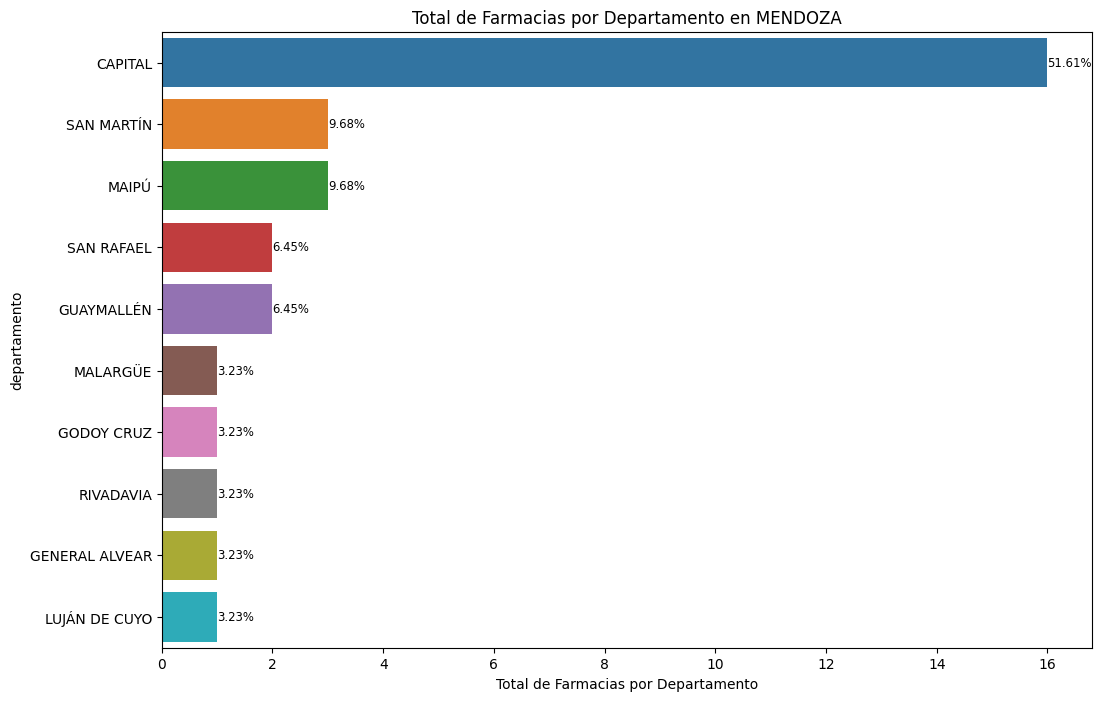

In [125]:
total_department_in_percent(province=mendoza, figsize=(12,8))

Descargamos la información de las farmacias correpondientes a cada provincia.

In [126]:
for province_name_by_index in provinces:
    df_province = data_allprovinces[province_name_by_index]
    file_path = file_path_crib.format(
        category = farmacias["name"],
        year = now.year,
        month = now.month,
        day = now.day,
        province = f"farmacias_{province_name_by_index.lower().replace(' ', '_')}",
    )
    province_path = BASE_FILE_DIR / file_path
    # save data frame in CSV file
    df_province.to_csv(province_path)